Group number 1 
- Harigovind Raghunath 22B0057
- Ananya Chavadhal 22B0045
- Kalpesh Khare 22B0069
- Ronak Sonkiya 22B0007
- Jugal Shah 22B0043
- Swetansh Gautam 22B0032

<h1>Through this project we aim to analyse the Indian Census of 2011 </h1>

# Random Variables Visualization and Distribution Fitting 

The random variables we have chosen are-
- Literacy rate
- Washrooms
- internet connectivity
- percentage of graduates
- population
- Percentage of urban households
- Female literacy rate
- percentage of households havng luxuries

<h5>Visualization of the data</h5>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats

In [2]:
df = pd.read_csv(r'C:\\Users\\anany\\Desktop\\SEM 4\\indiacensus.csv')
print(df.head())

   District code         State name District name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Male_Literate  Female_Literate    SC  ...  \
0    439654         282823           156831  1048  ...   
1    335649         207741           127908   368  ...   
2     93770          62834            30936   488  ...   
3     86236          56301            29935    18  ...   
4    261724         163333            98391   556  ...   

   Power_Parity_Rs_90000_150000  Power_Parity_Rs_45000_150000  \
0                            94                           588   
1                           126   

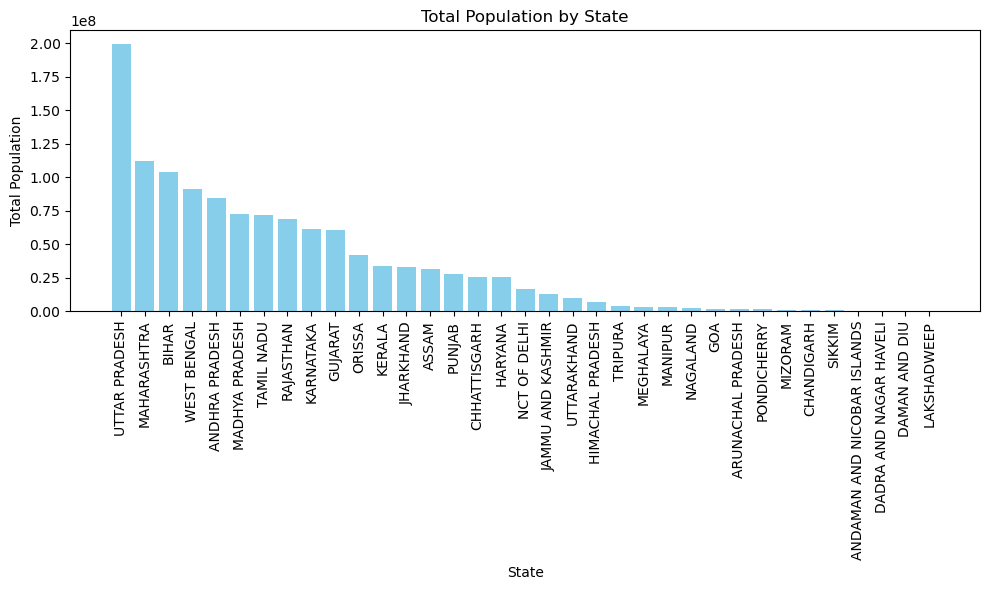

In [3]:
grouped_df = df.groupby('State name')['Population'].sum().reset_index()
grouped_df = grouped_df.sort_values(by='Population', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(grouped_df['State name'], grouped_df['Population'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.title('Total Population by State')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

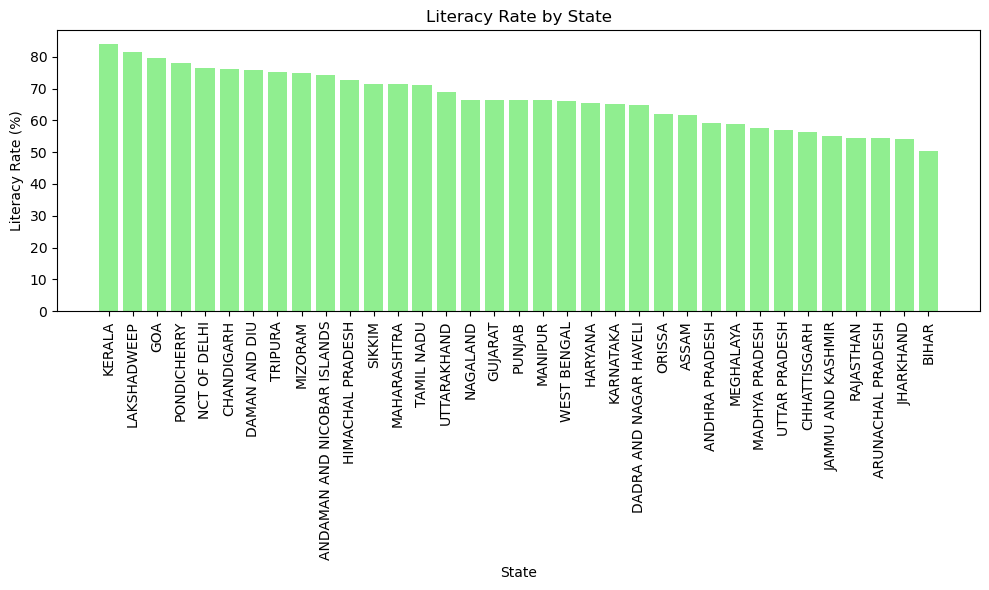

In [4]:
df['LiteracyRate'] = (df['Literate'] / df['Population']) * 100
grouped_df_literacy_rate = df.groupby('State name')['LiteracyRate'].mean().reset_index()
grouped_df_literacy_rate = grouped_df_literacy_rate.sort_values(by='LiteracyRate', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(grouped_df_literacy_rate['State name'], grouped_df_literacy_rate['LiteracyRate'], color='lightgreen')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rate by State')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

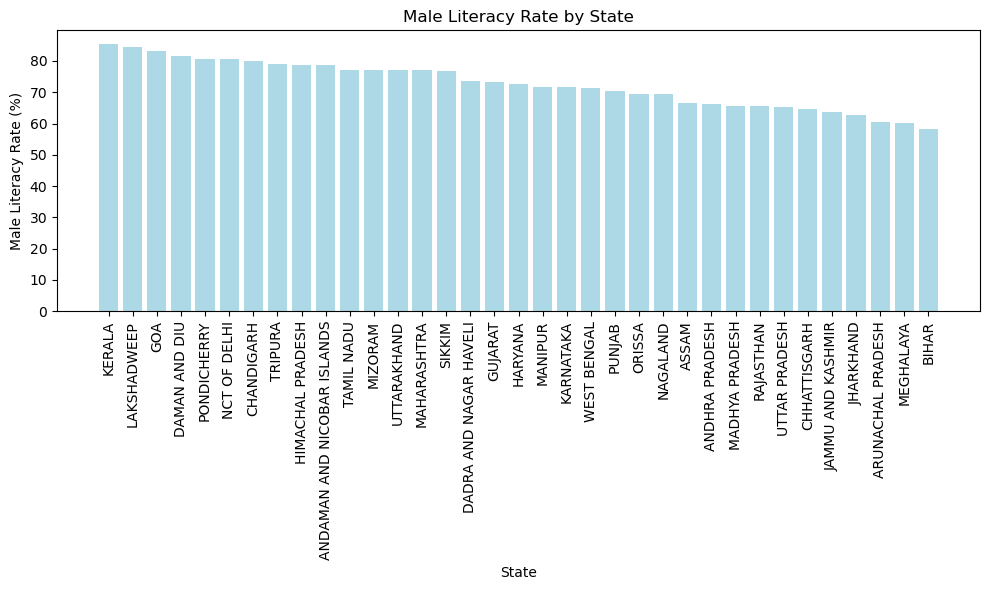

In [5]:
# Calculate Literacy Rate as percentage
df['LiteracyRate'] = (df['Male_Literate'] / df['Male']) * 100

grouped_df_literacy_rate = df.groupby('State name')['LiteracyRate'].mean().reset_index()
grouped_df_literacy_rate = grouped_df_literacy_rate.sort_values(by='LiteracyRate', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_df_literacy_rate['State name'], grouped_df_literacy_rate['LiteracyRate'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Male Literacy Rate (%)')
plt.title('Male Literacy Rate by State')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

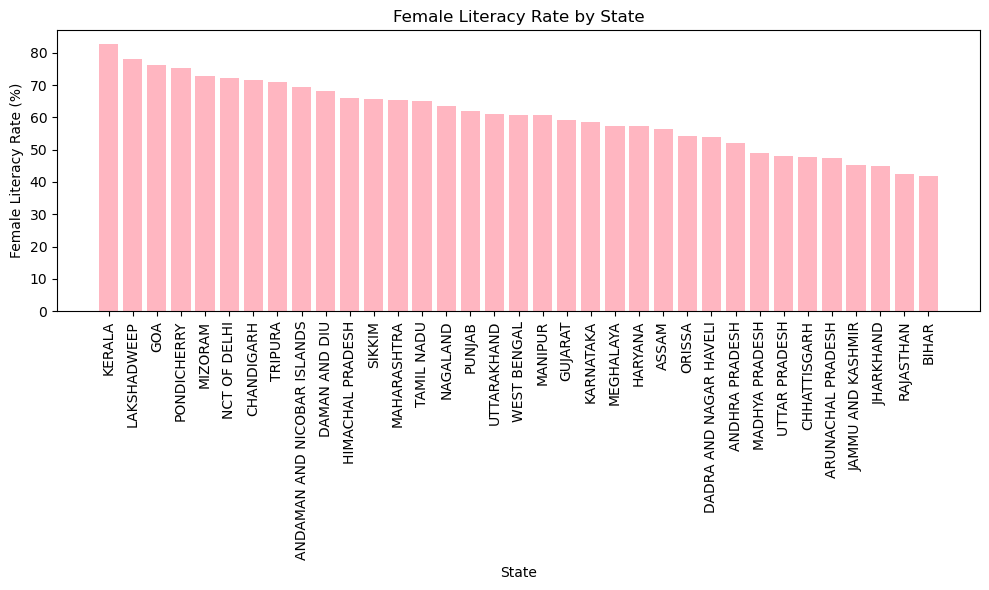

In [6]:
# Calculate Literacy Rate as percentage
df['LiteracyRate'] = (df['Female_Literate'] / df['Female']) * 100

grouped_df_literacy_rate = df.groupby('State name')['LiteracyRate'].mean().reset_index()
grouped_df_literacy_rate = grouped_df_literacy_rate.sort_values(by='LiteracyRate', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_df_literacy_rate['State name'], grouped_df_literacy_rate['LiteracyRate'], color='lightpink')
plt.xlabel('State')
plt.ylabel('Female Literacy Rate (%)')
plt.title('Female Literacy Rate by State')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

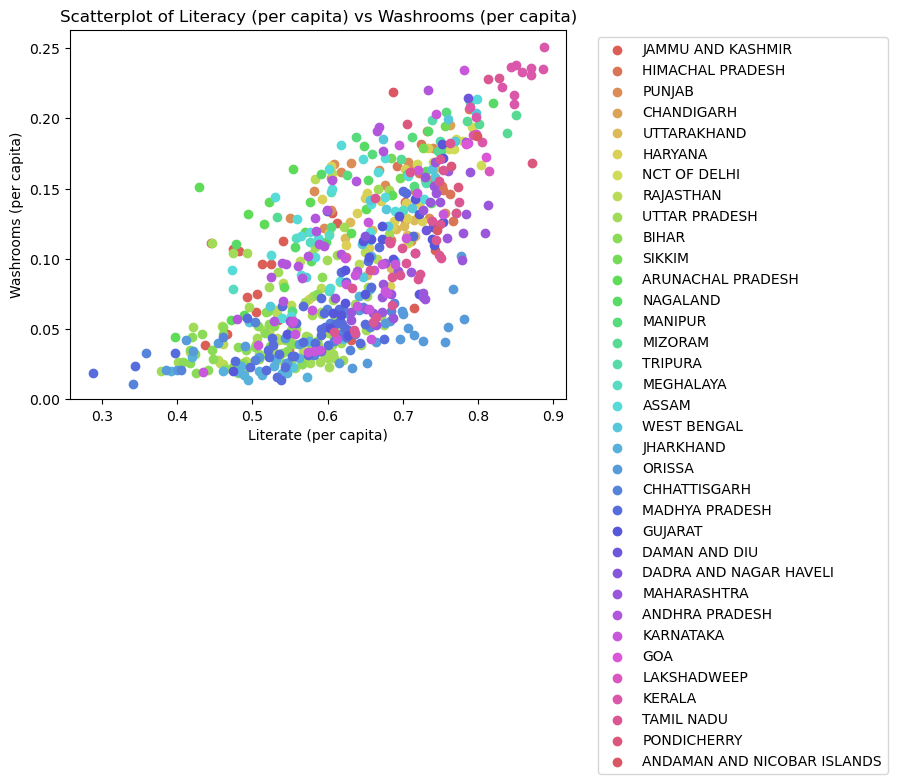

In [7]:
state_colors = sns.color_palette("hls", len(df['State name'].unique()))
state_color_map = dict(zip(df['State name'].unique(), state_colors))

for state in df['State name'].unique():
    plt.scatter(df[df['State name'] == state]['Literate'] / df[df['State name'] == state]['Population'], 
                df[df['State name'] == state]['Having_latrine_facility_within_the_premises_Total_Households'] / df[df['State name'] == state]['Population'], 
                color=state_color_map[state], 
                label=state)

plt.xlabel('Literate (per capita)')
plt.ylabel('Washrooms (per capita)')
plt.title('Scatterplot of Literacy (per capita) vs Washrooms (per capita)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(bottom=0)
plt.show()

We can see that there is a general realation between the two parameters where a higher literate population generally tends to have access to washrooms  

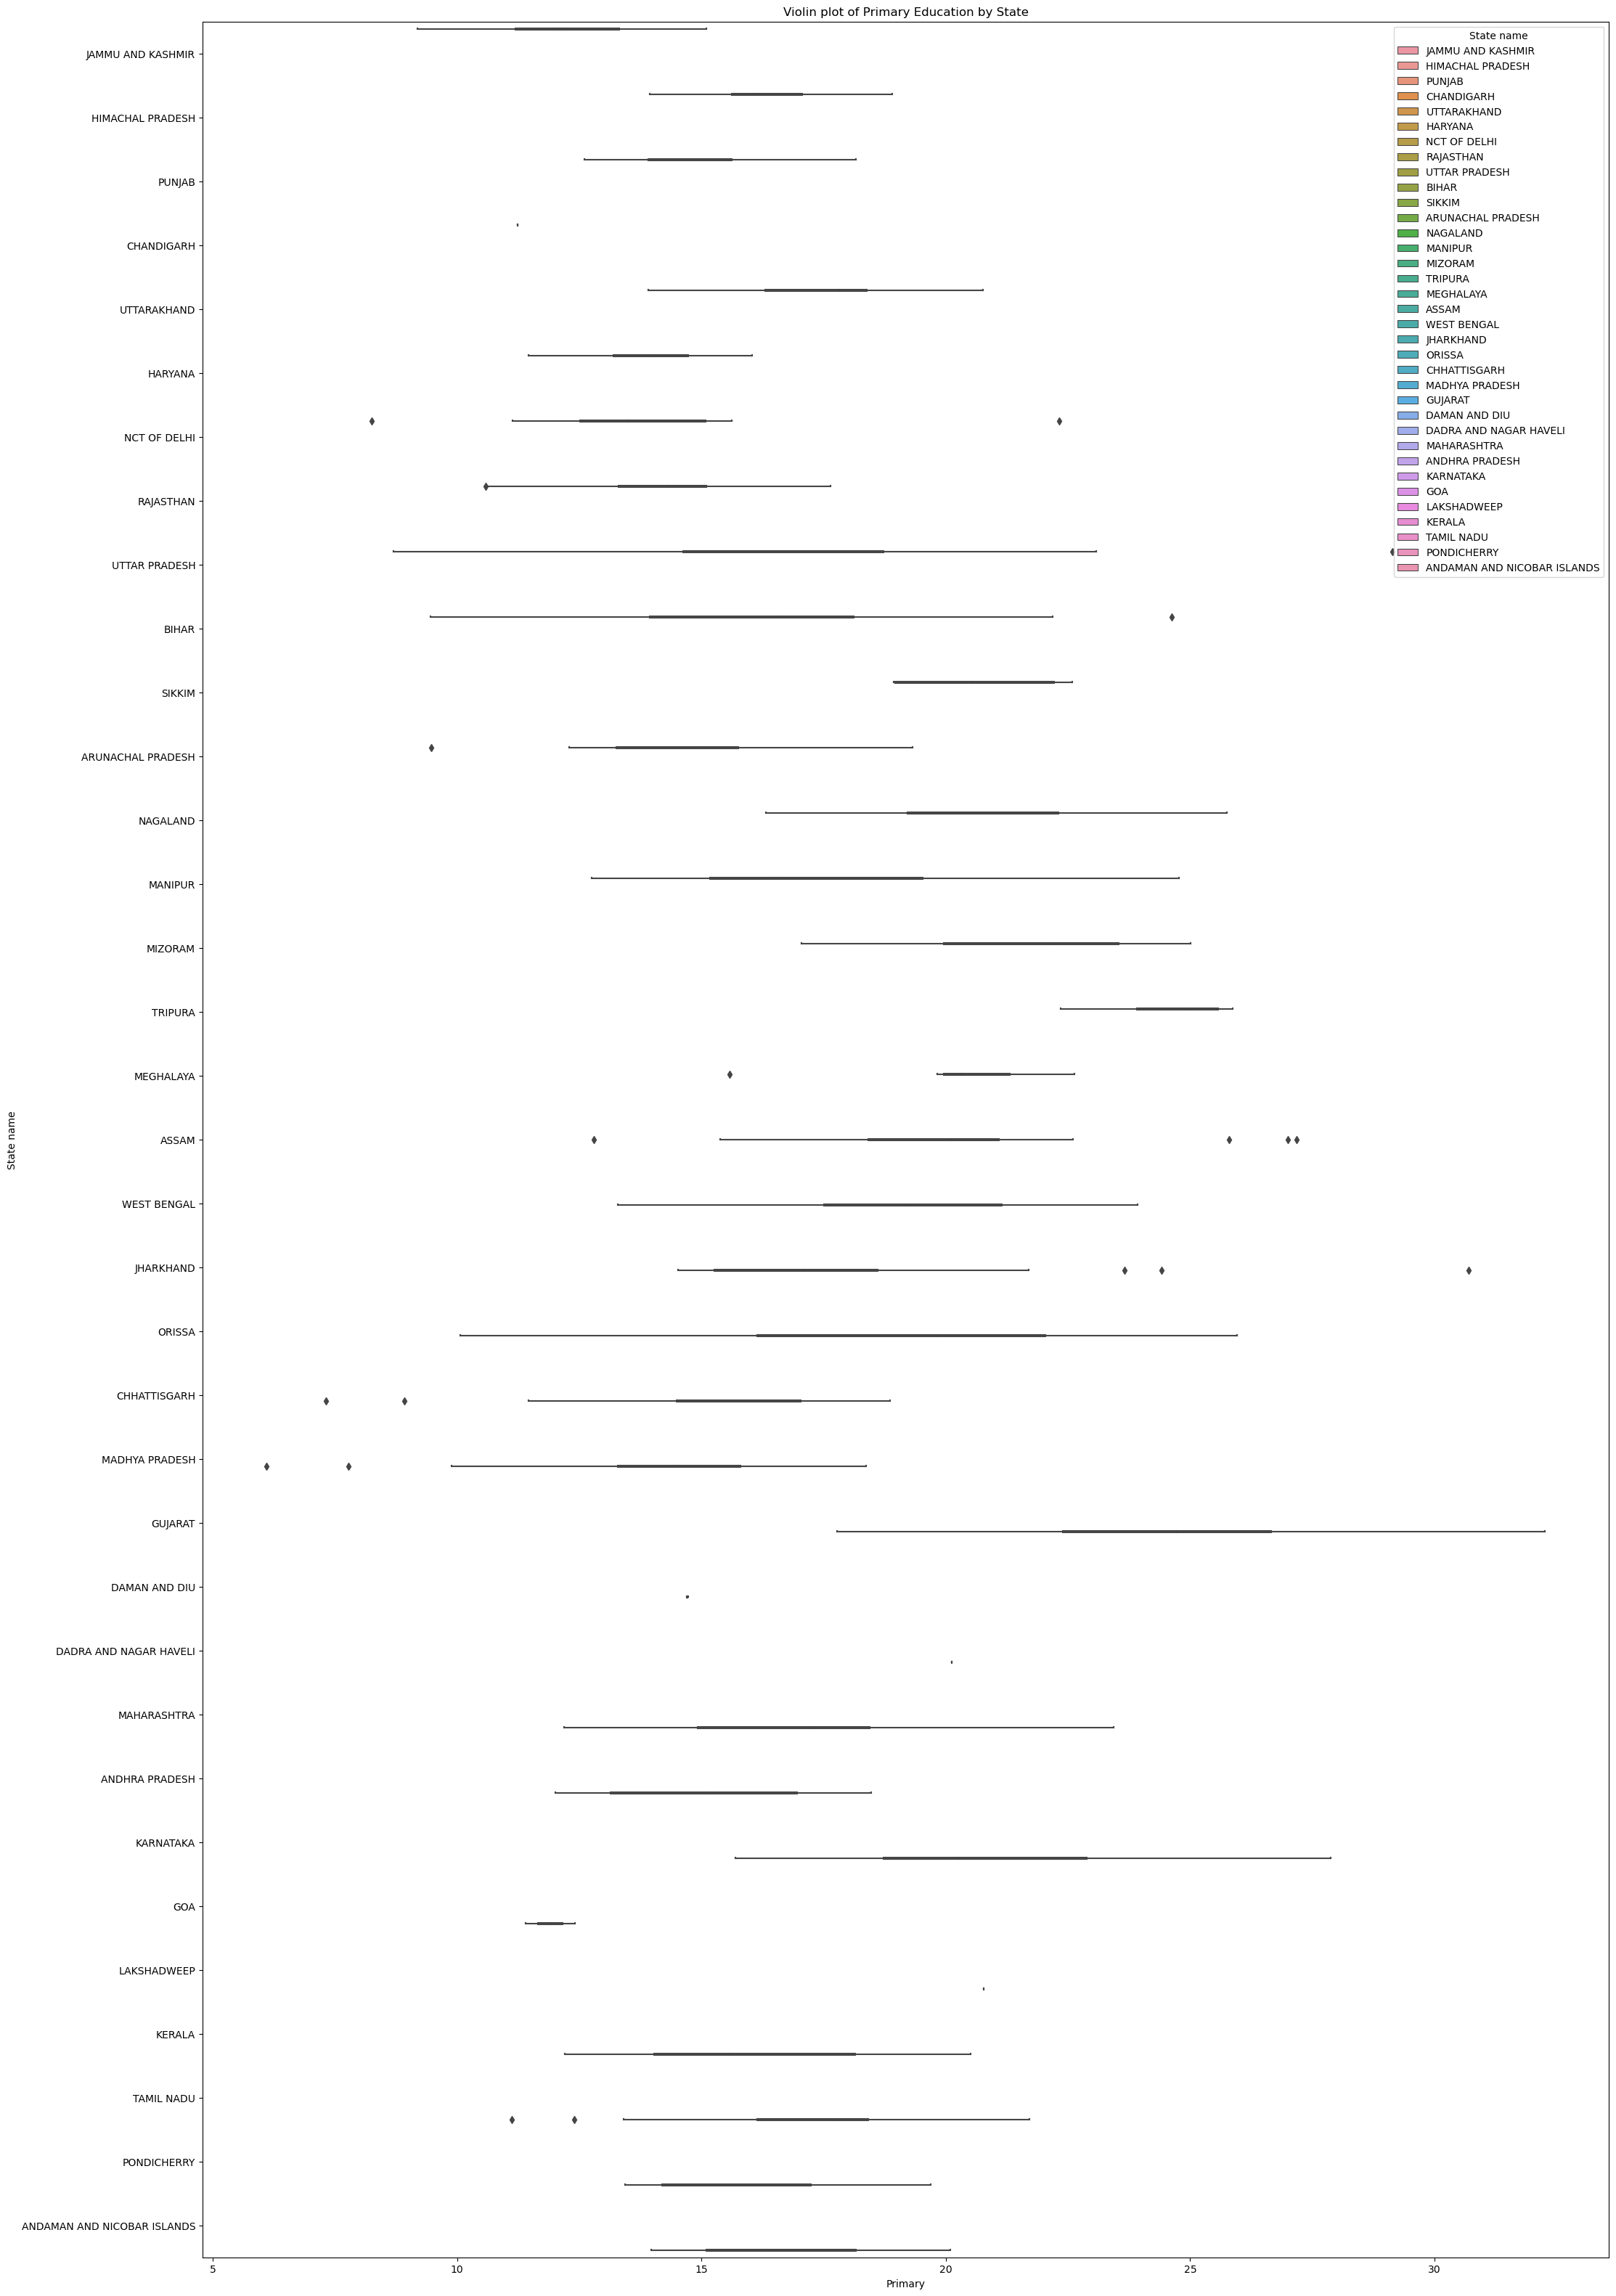

In [8]:
plt.figure(figsize=(25, 40))
df['Primary%'] = df['Primary_Education'] / df['Population'] * 100
df_melted = df.melt(id_vars='State name', value_vars='Primary%', var_name='Subject', value_name='Primary')

sns.boxplot(data=df_melted, x='Primary', y='State name', hue='State name')
plt.title('Violin plot of Primary Education by State')
plt.show()

We can see that the variation in primary educatoin across districts in Gujarat is quite high while in Goa it is quite small

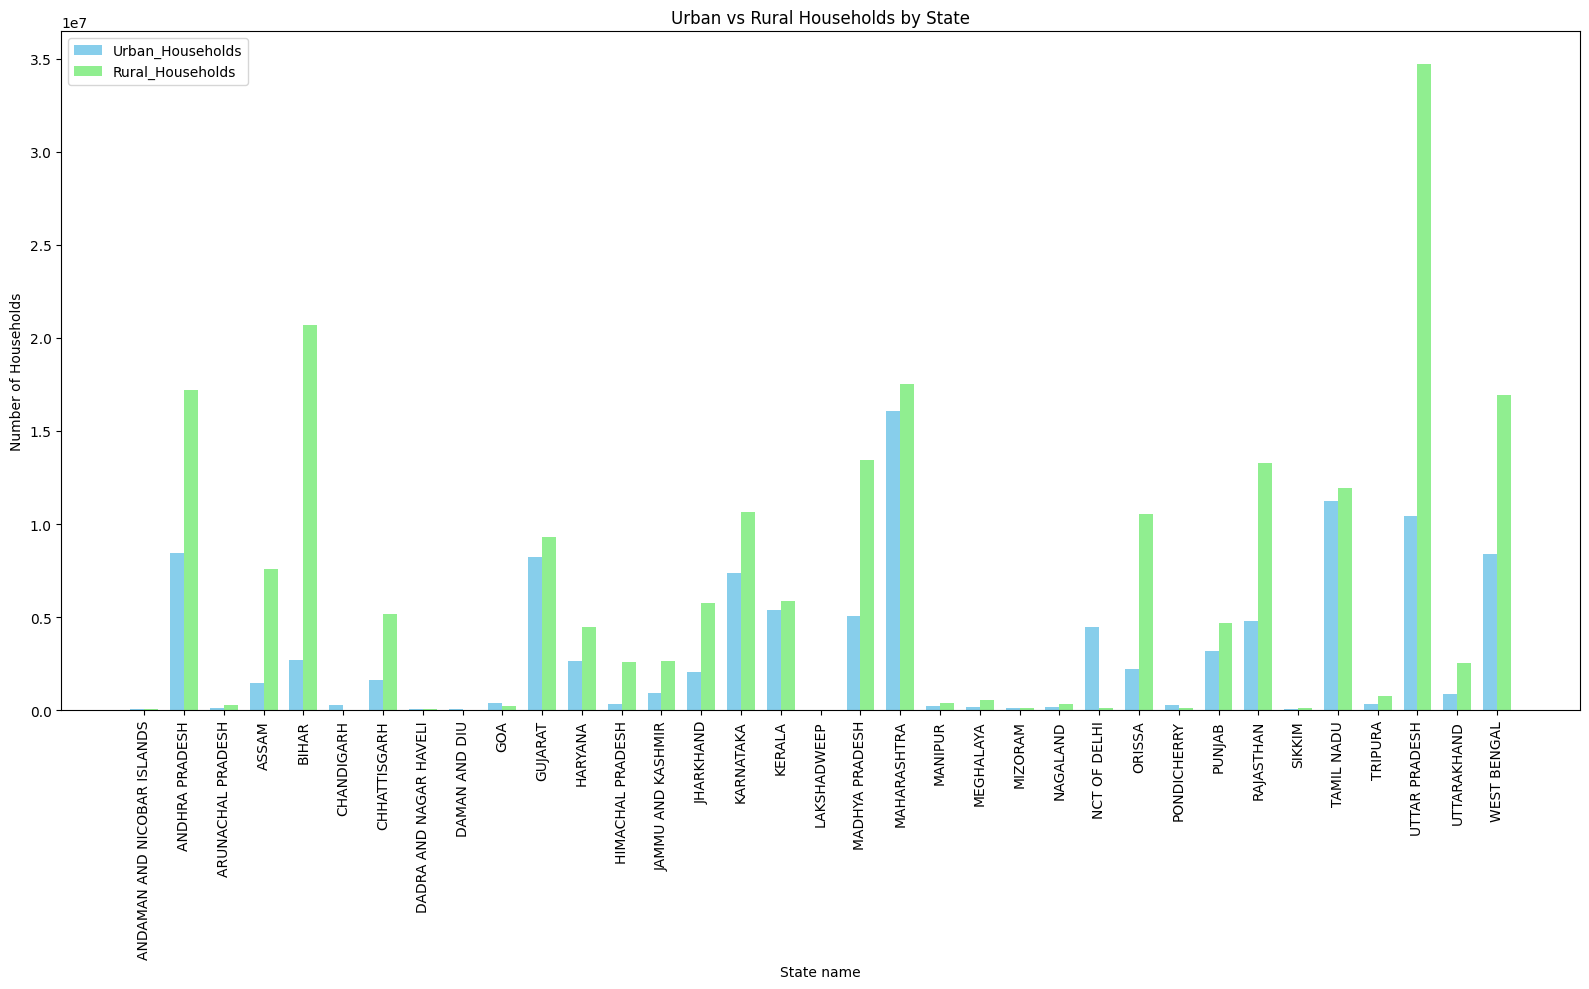

In [28]:
grouped_df_households = df.groupby('State name')[['Urban_Households', 'Rural_Households']].sum().reset_index()
grouped_df_households = grouped_df_households.sort_values(by='State name')

plt.figure(figsize=(16, 10))
bar_width = 0.35  
index = grouped_df_households.index  

plt.bar(index, grouped_df_households['Urban_Households'], width=bar_width, color='skyblue', label='Urban_Households')
plt.bar(index + bar_width, grouped_df_households['Rural_Households'], width=bar_width, color='lightgreen', label='Rural_Households')

plt.xlabel('State name')
plt.ylabel('Number of Households')
plt.title('Urban vs Rural Households by State')
plt.xticks(index + bar_width / 2, grouped_df_households['State name'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


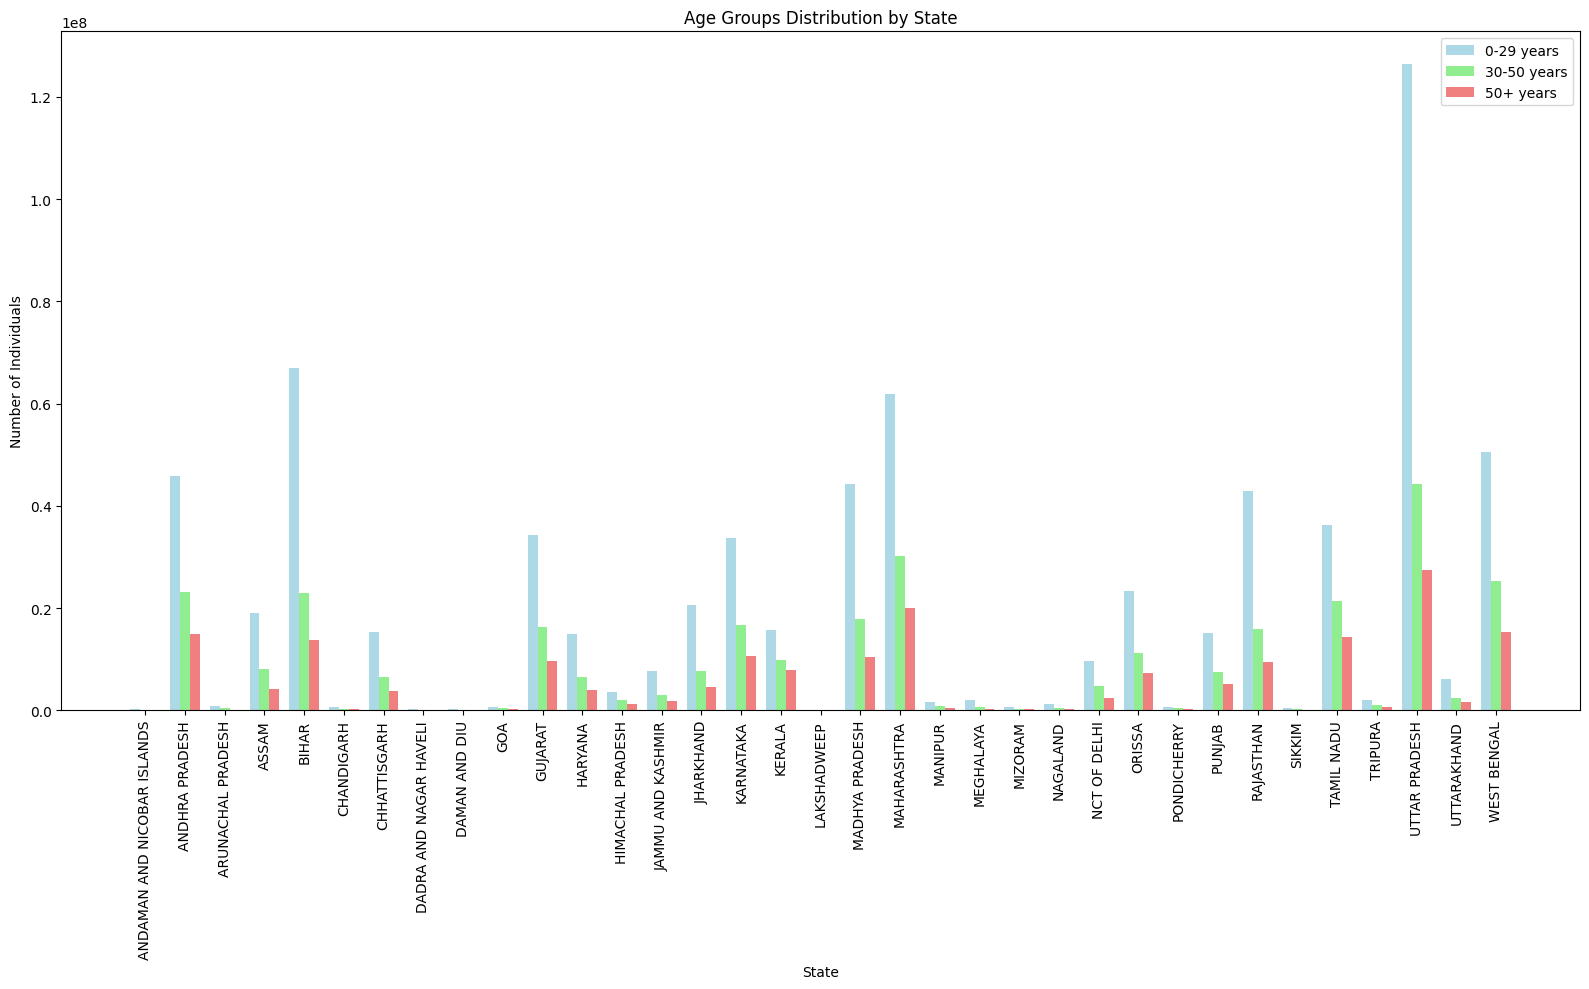

In [29]:

grouped_df_age_groups = df.groupby('State name')[['Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50']].sum().reset_index()
grouped_df_age_groups = grouped_df_age_groups.sort_values(by='State name')

plt.figure(figsize=(16, 10))
bar_width = 0.25  
index = grouped_df_age_groups.index  

plt.bar(index, grouped_df_age_groups['Age_Group_0_29'], width=bar_width, color='lightblue', label='0-29 years')
plt.bar(index + bar_width, grouped_df_age_groups['Age_Group_30_49'], width=bar_width, color='lightgreen', label='30-50 years')
plt.bar(index + 2*bar_width, grouped_df_age_groups['Age_Group_50'], width=bar_width, color='lightcoral', label='50+ years')

plt.xlabel('State')
plt.ylabel('Number of Individuals')
plt.title('Age Groups Distribution by State')
plt.xticks(index + bar_width, grouped_df_age_groups['State name'], rotation=90) 
plt.legend()
plt.tight_layout()
plt.show()

# Fitting the Random Variables

In this section, we plot fits for our chosen random variables. 
We will try fitting our random variable for normal distribution, t distribution, exponential distribution, uniform distribution, chi sqaured distribution, f distribution, gamma distribution, logisitic fit, and weibull distribution, and then compare the actual distribution with these.

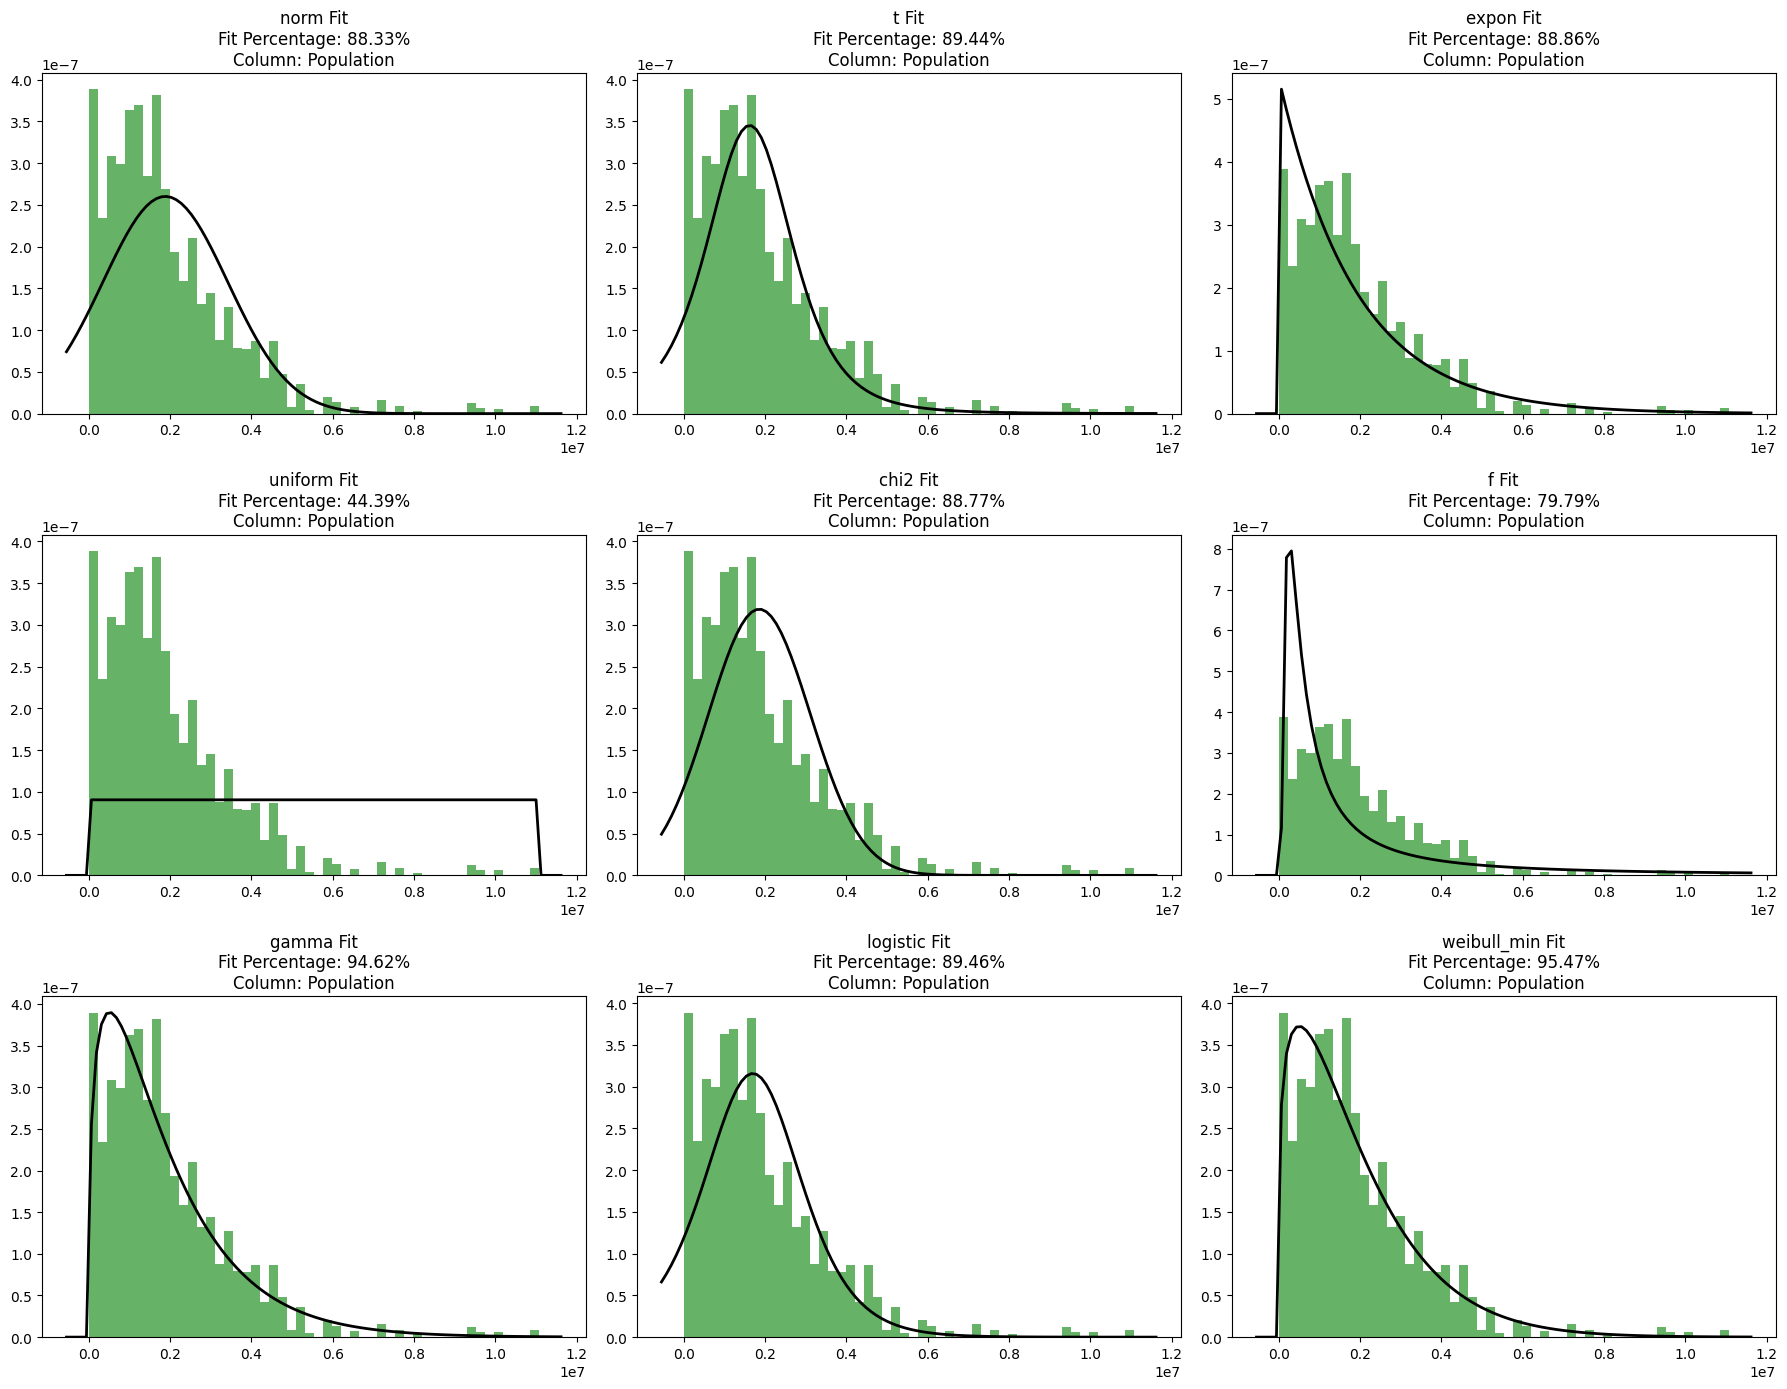

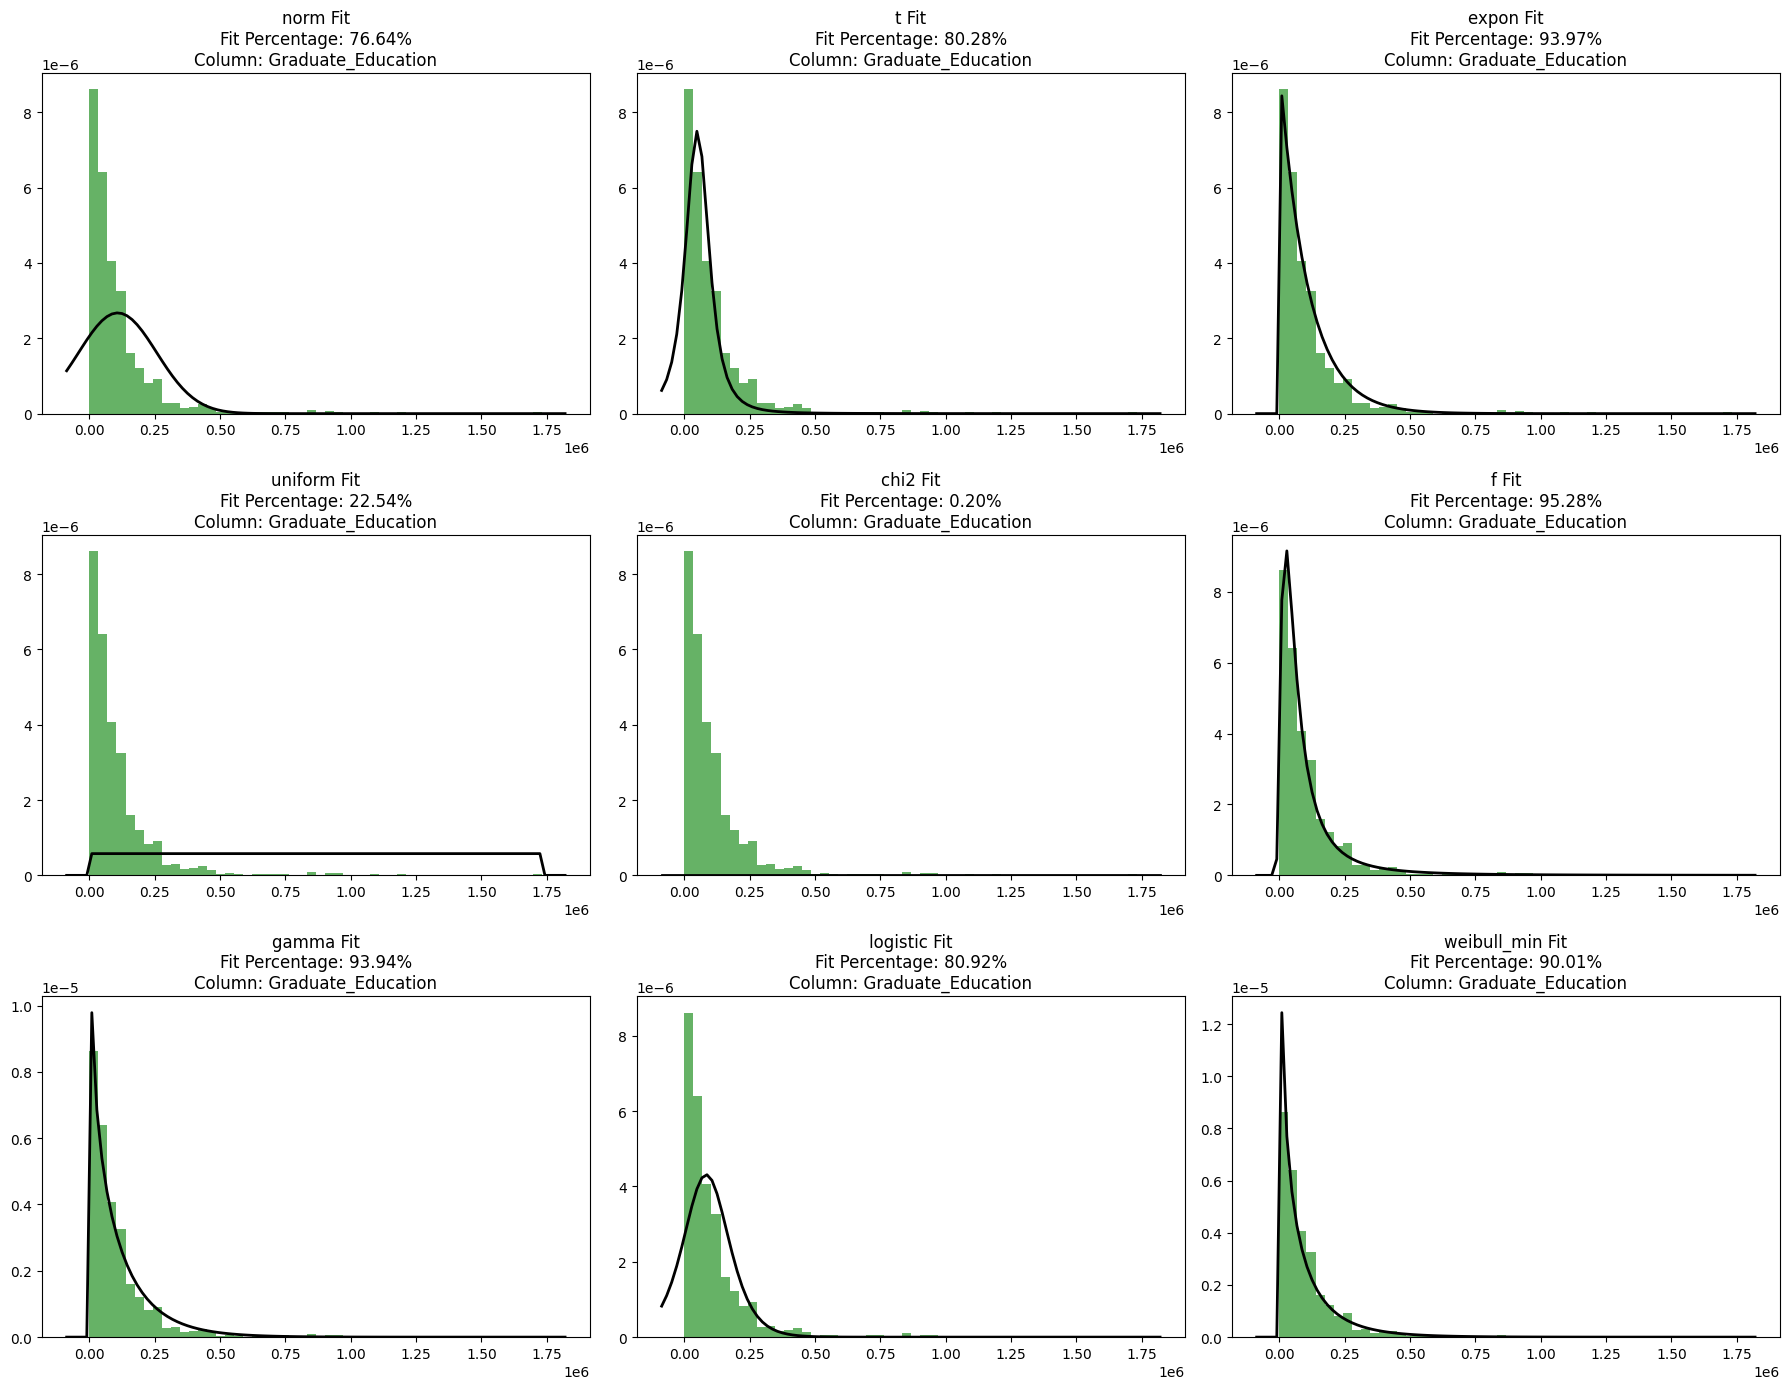

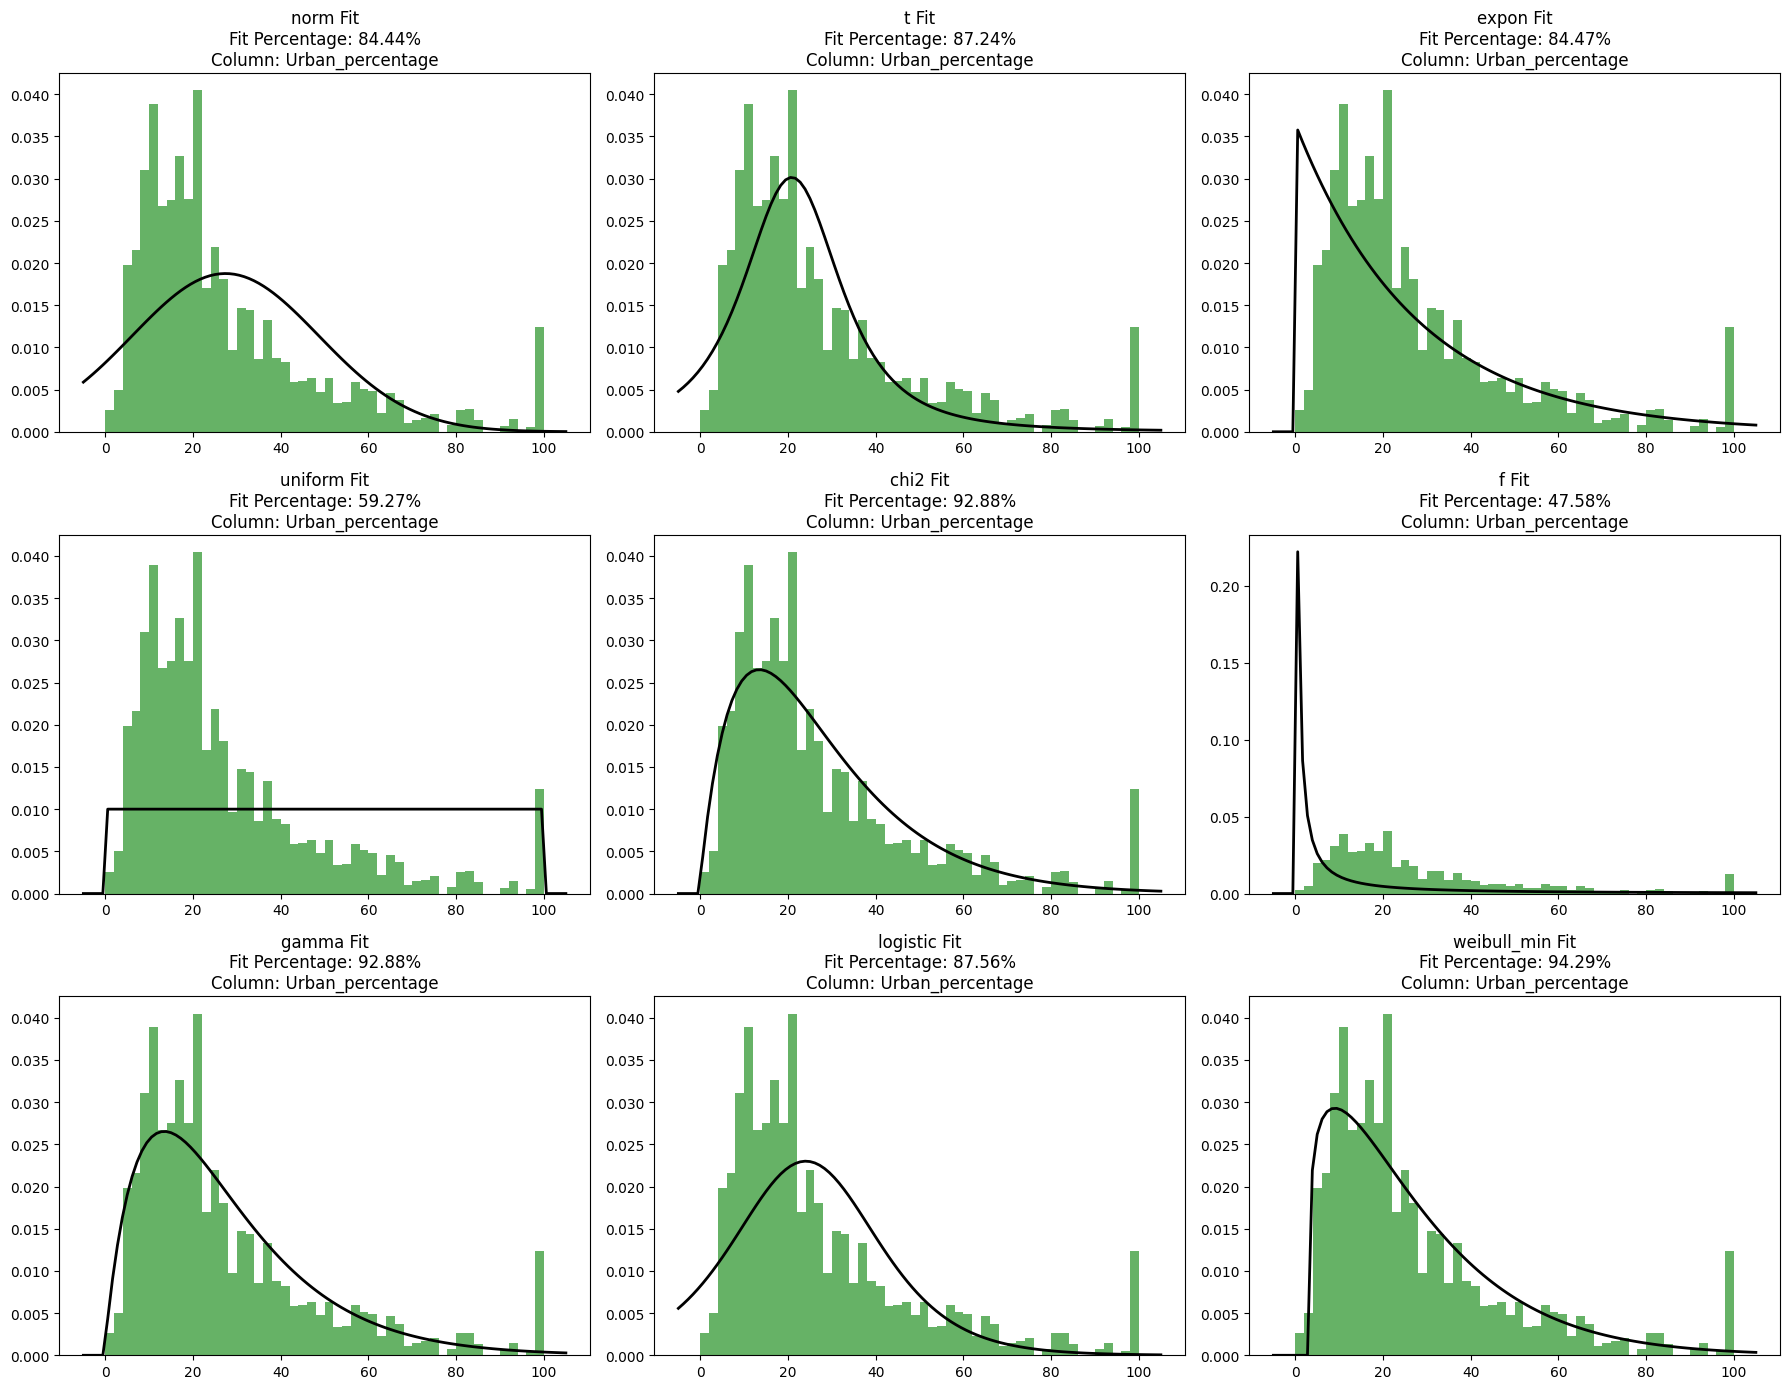

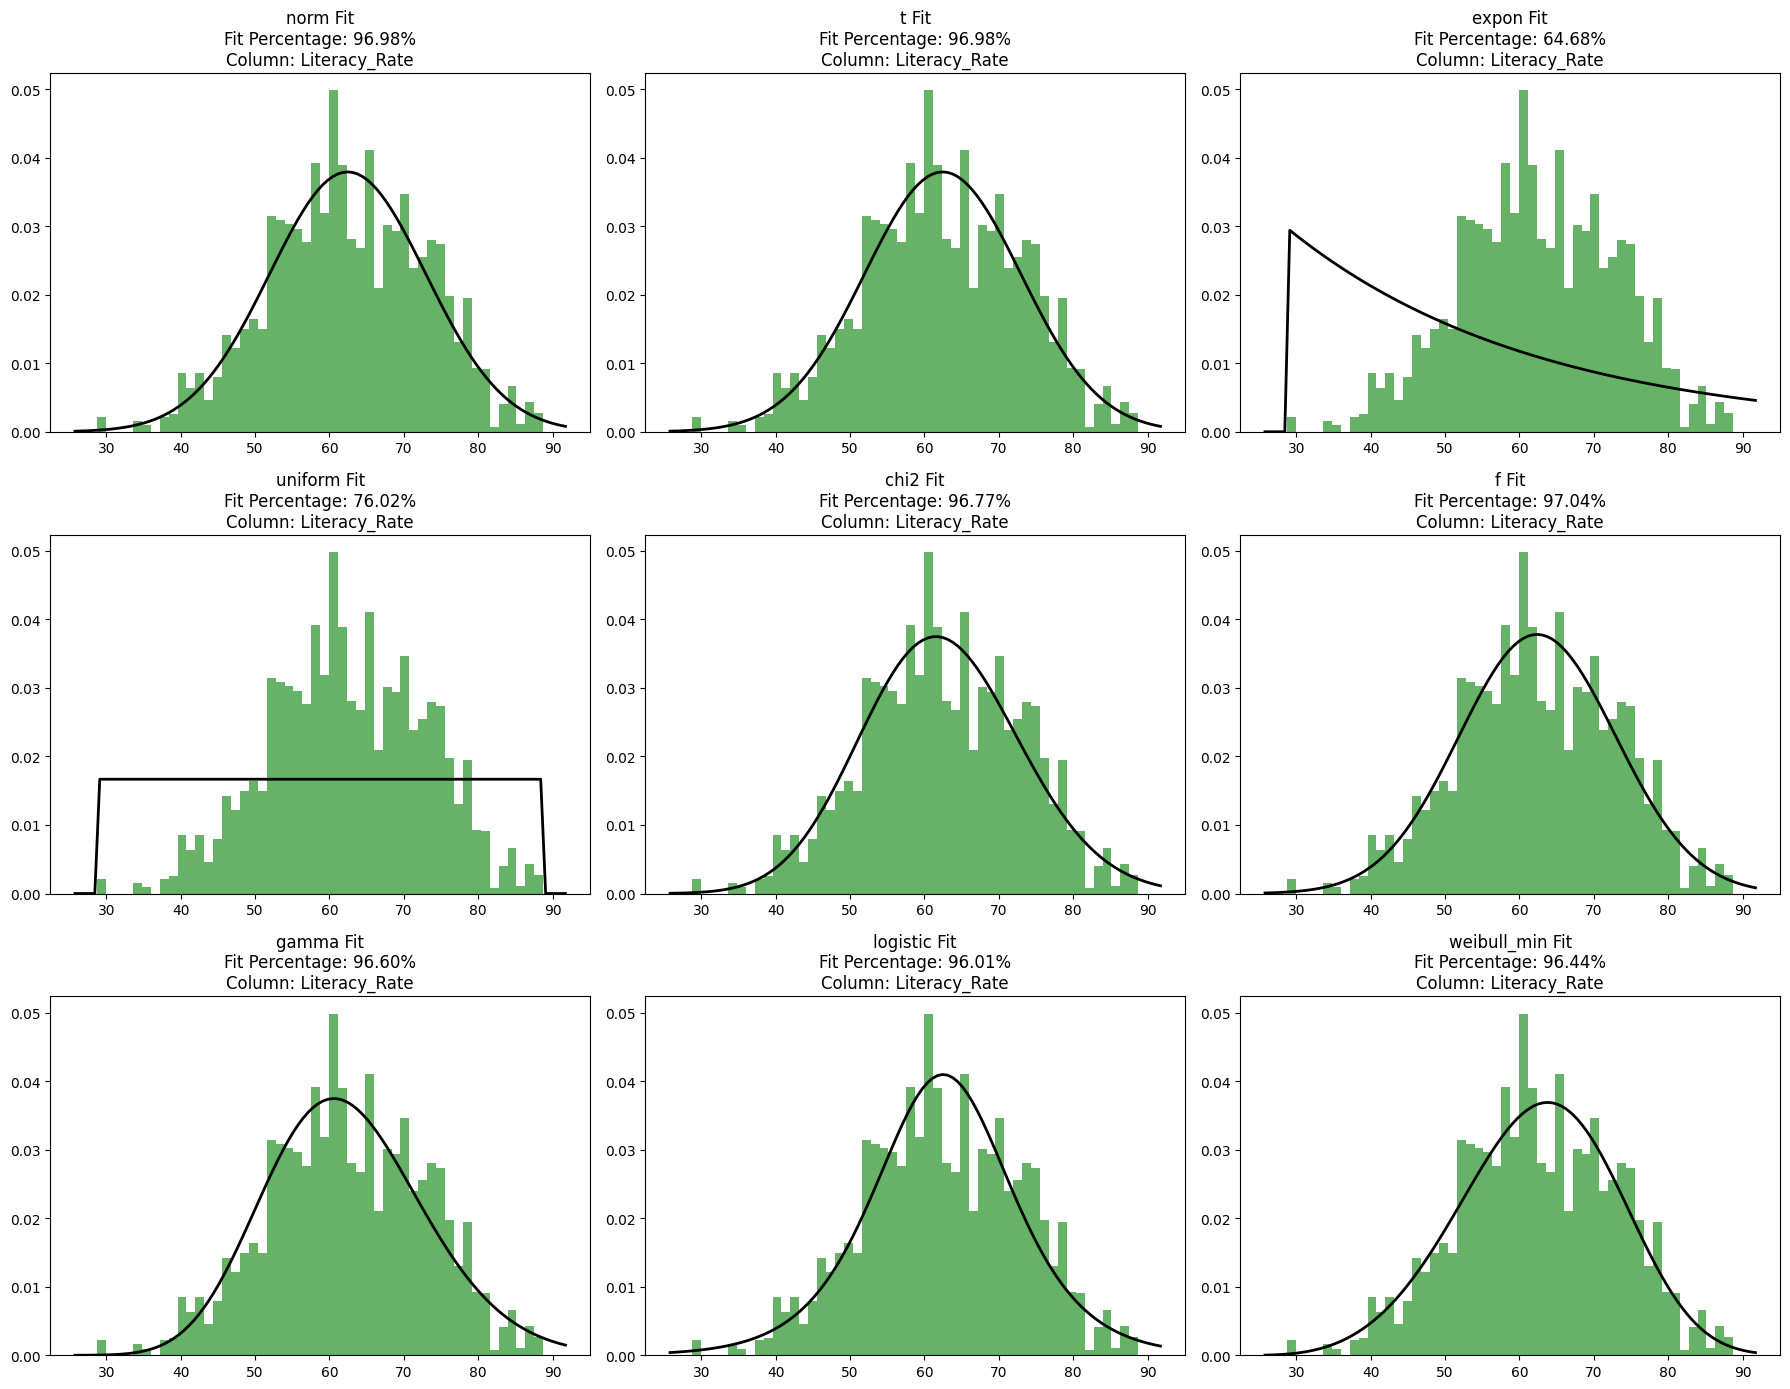

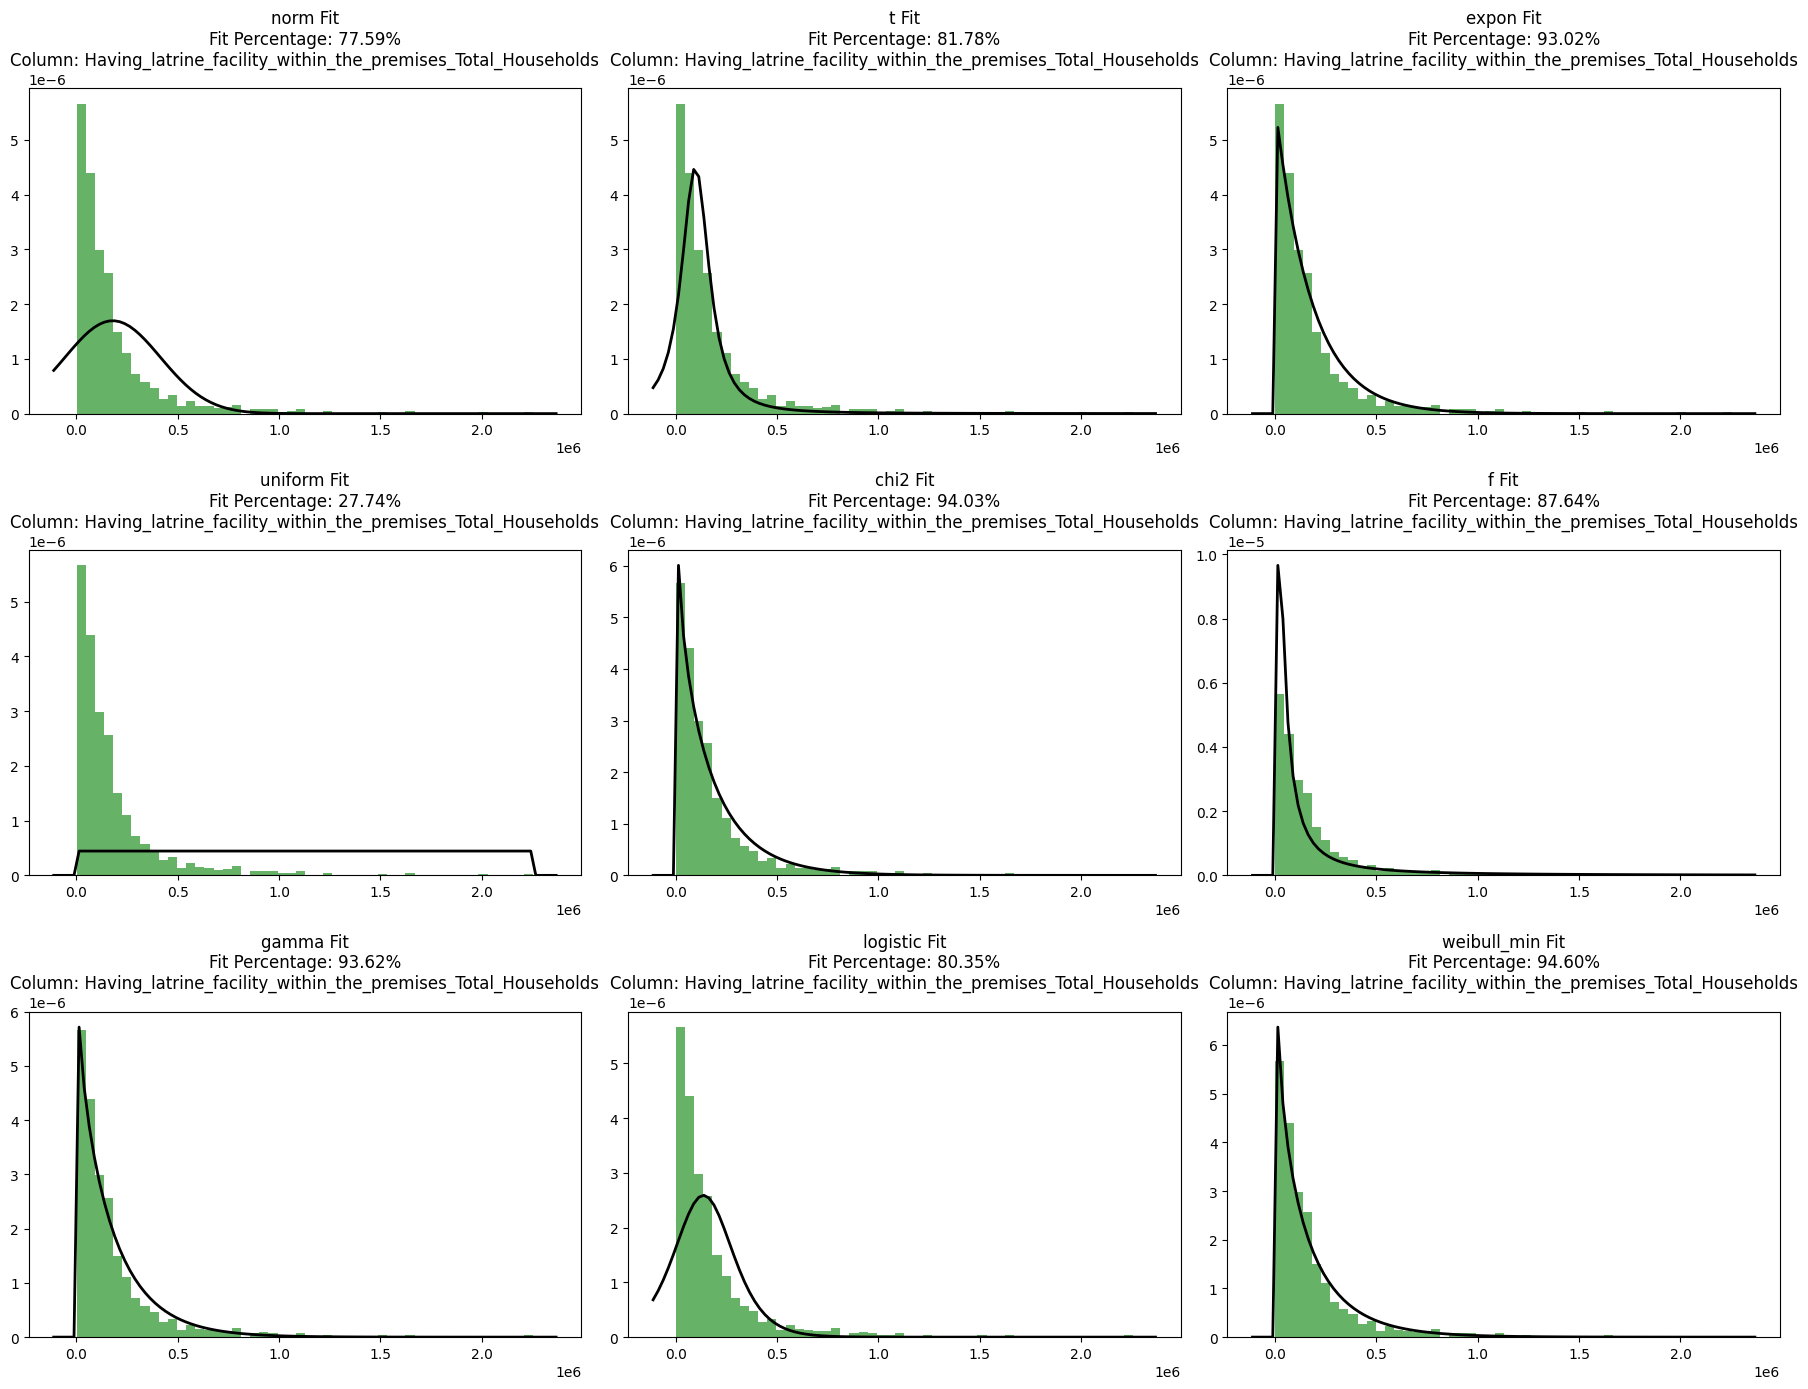

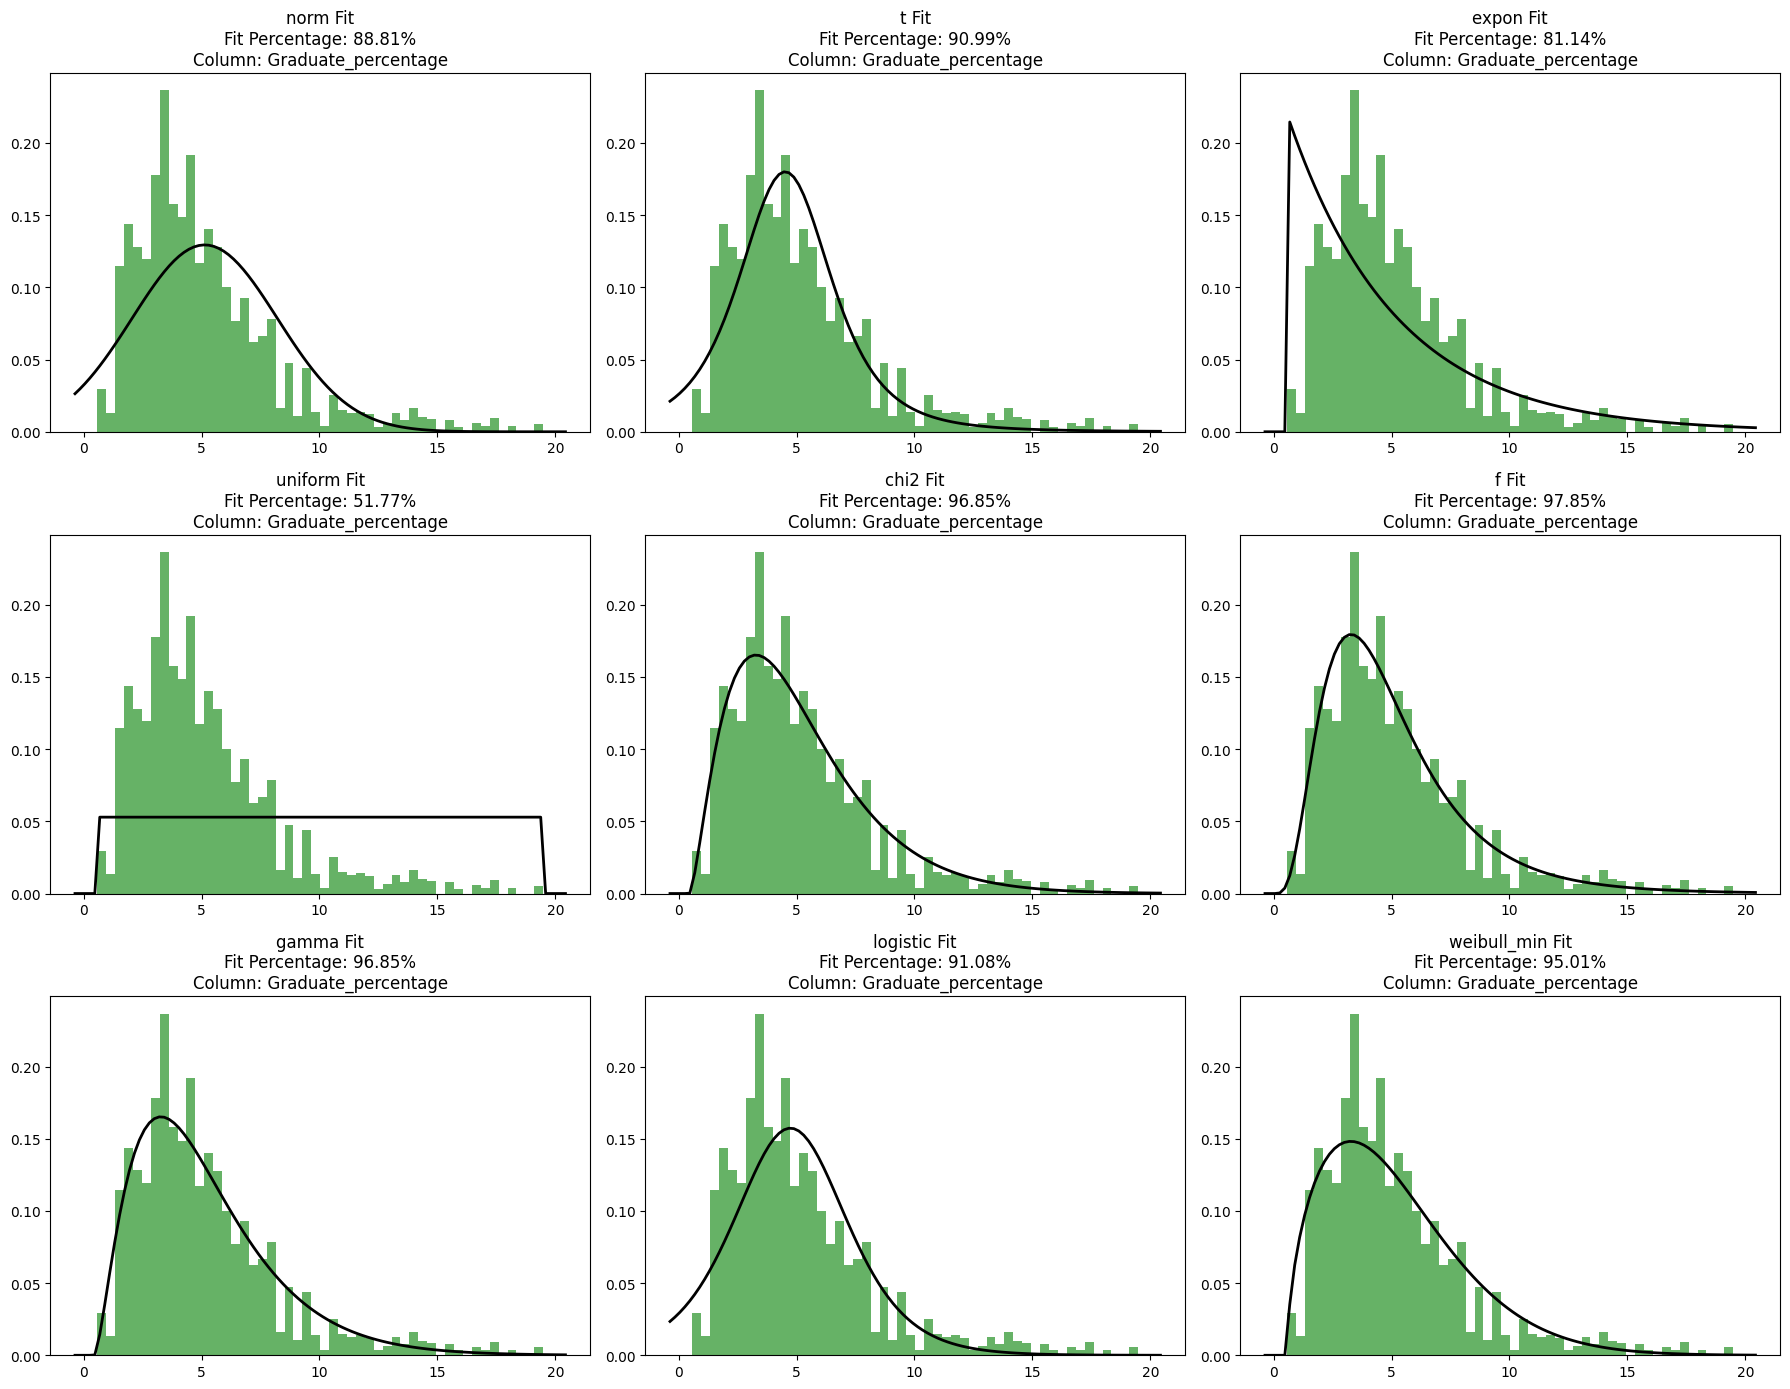

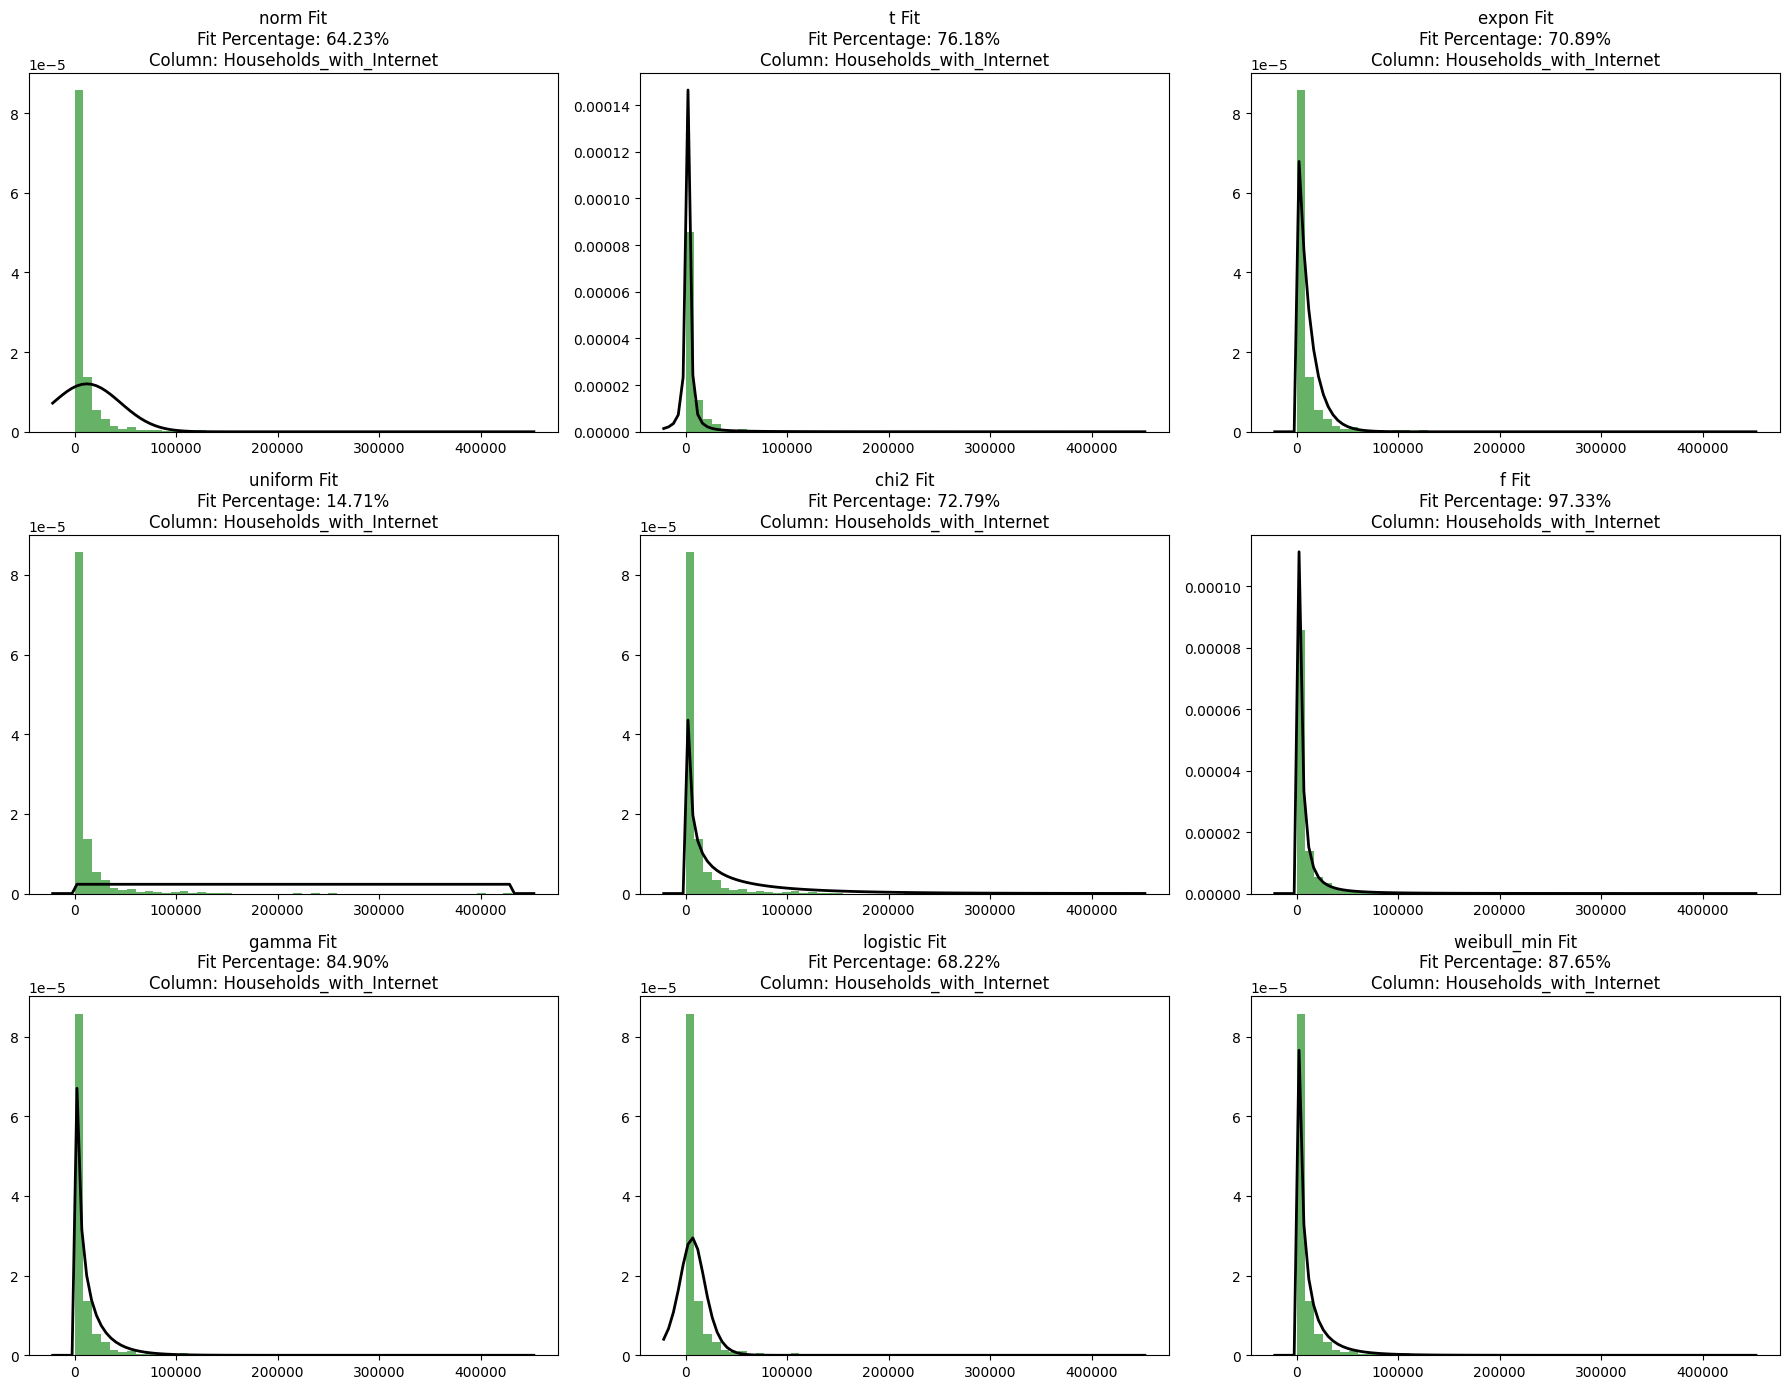

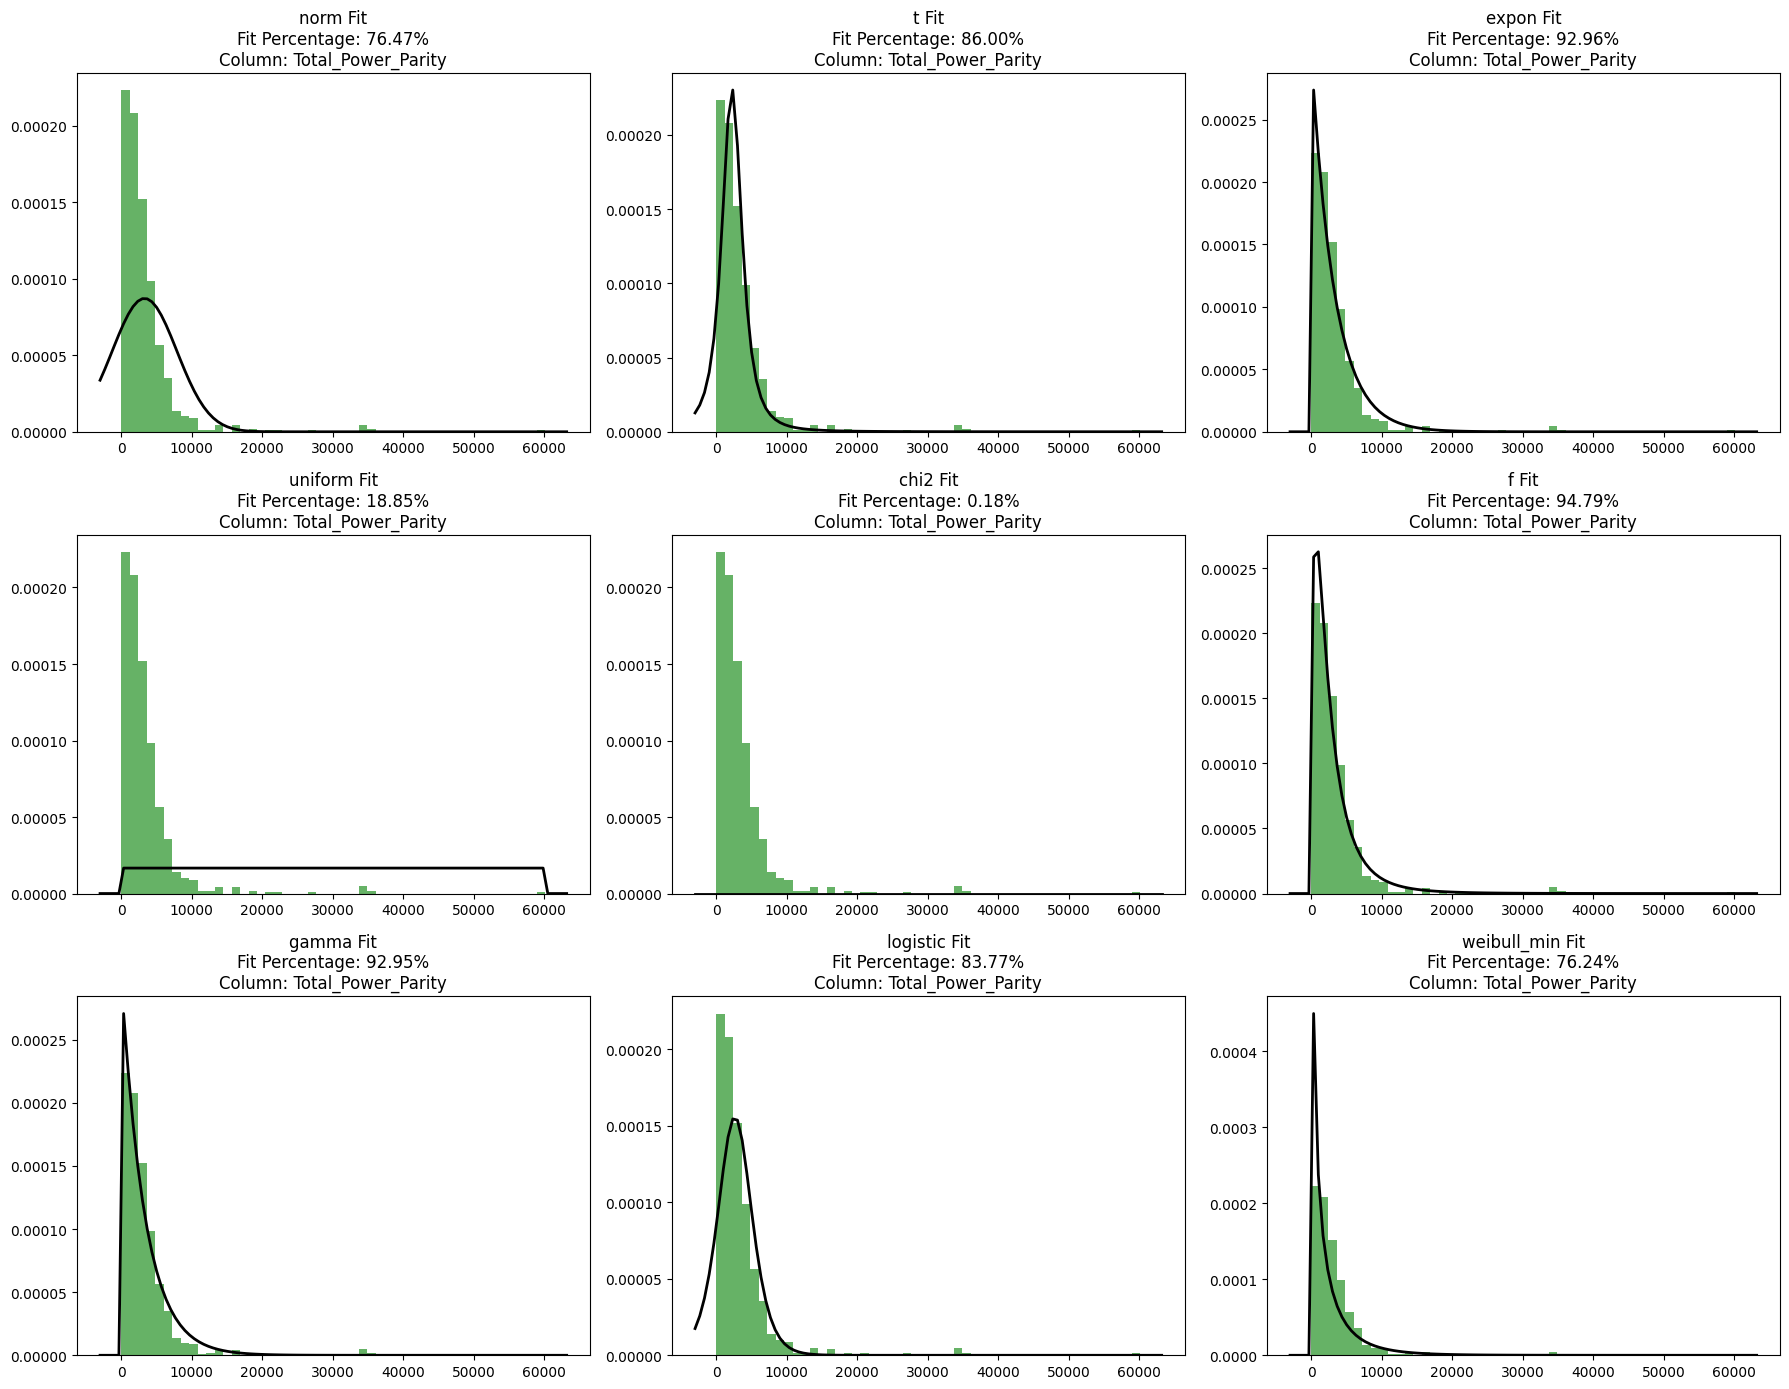

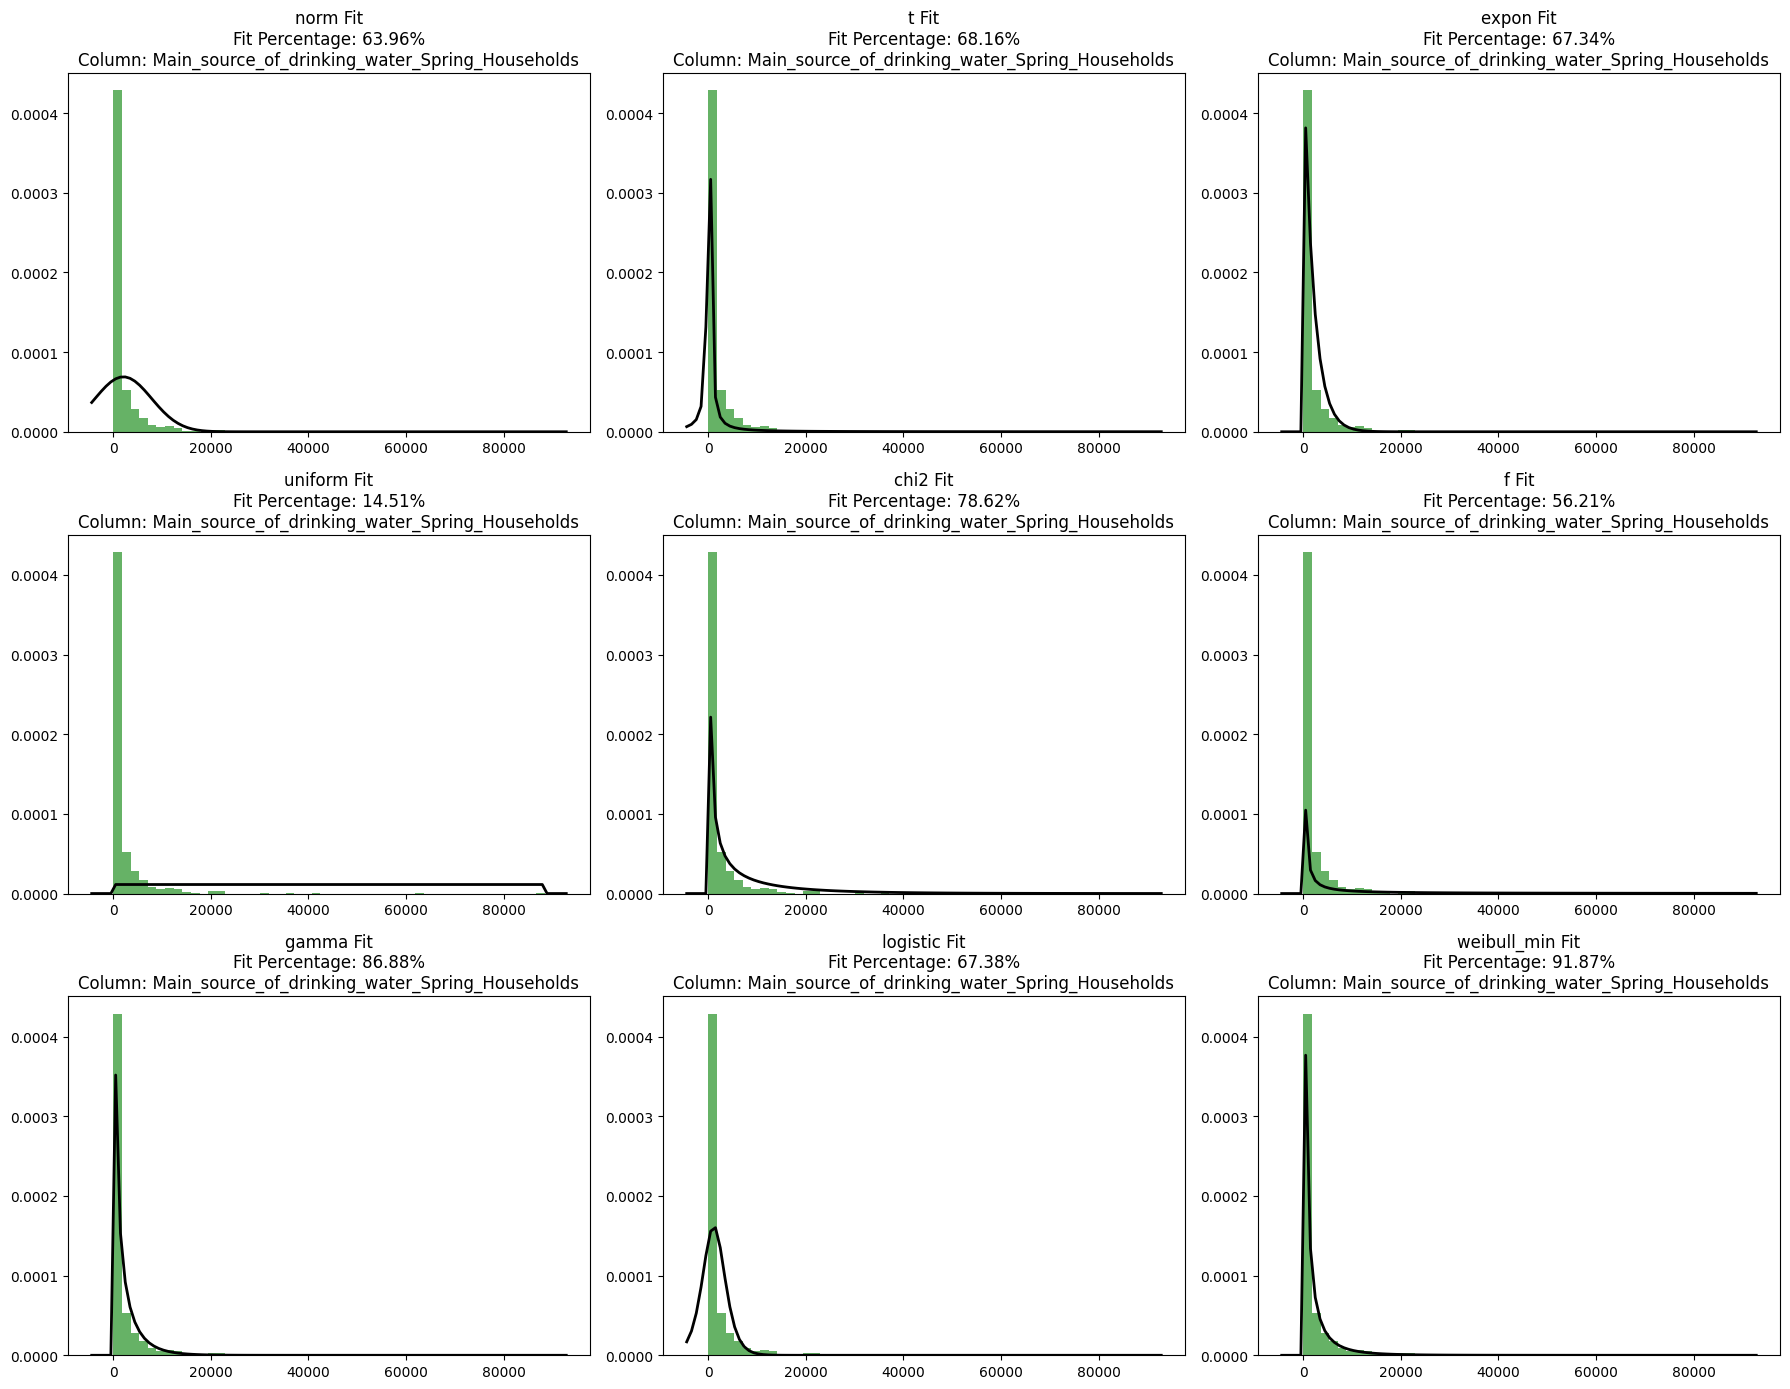

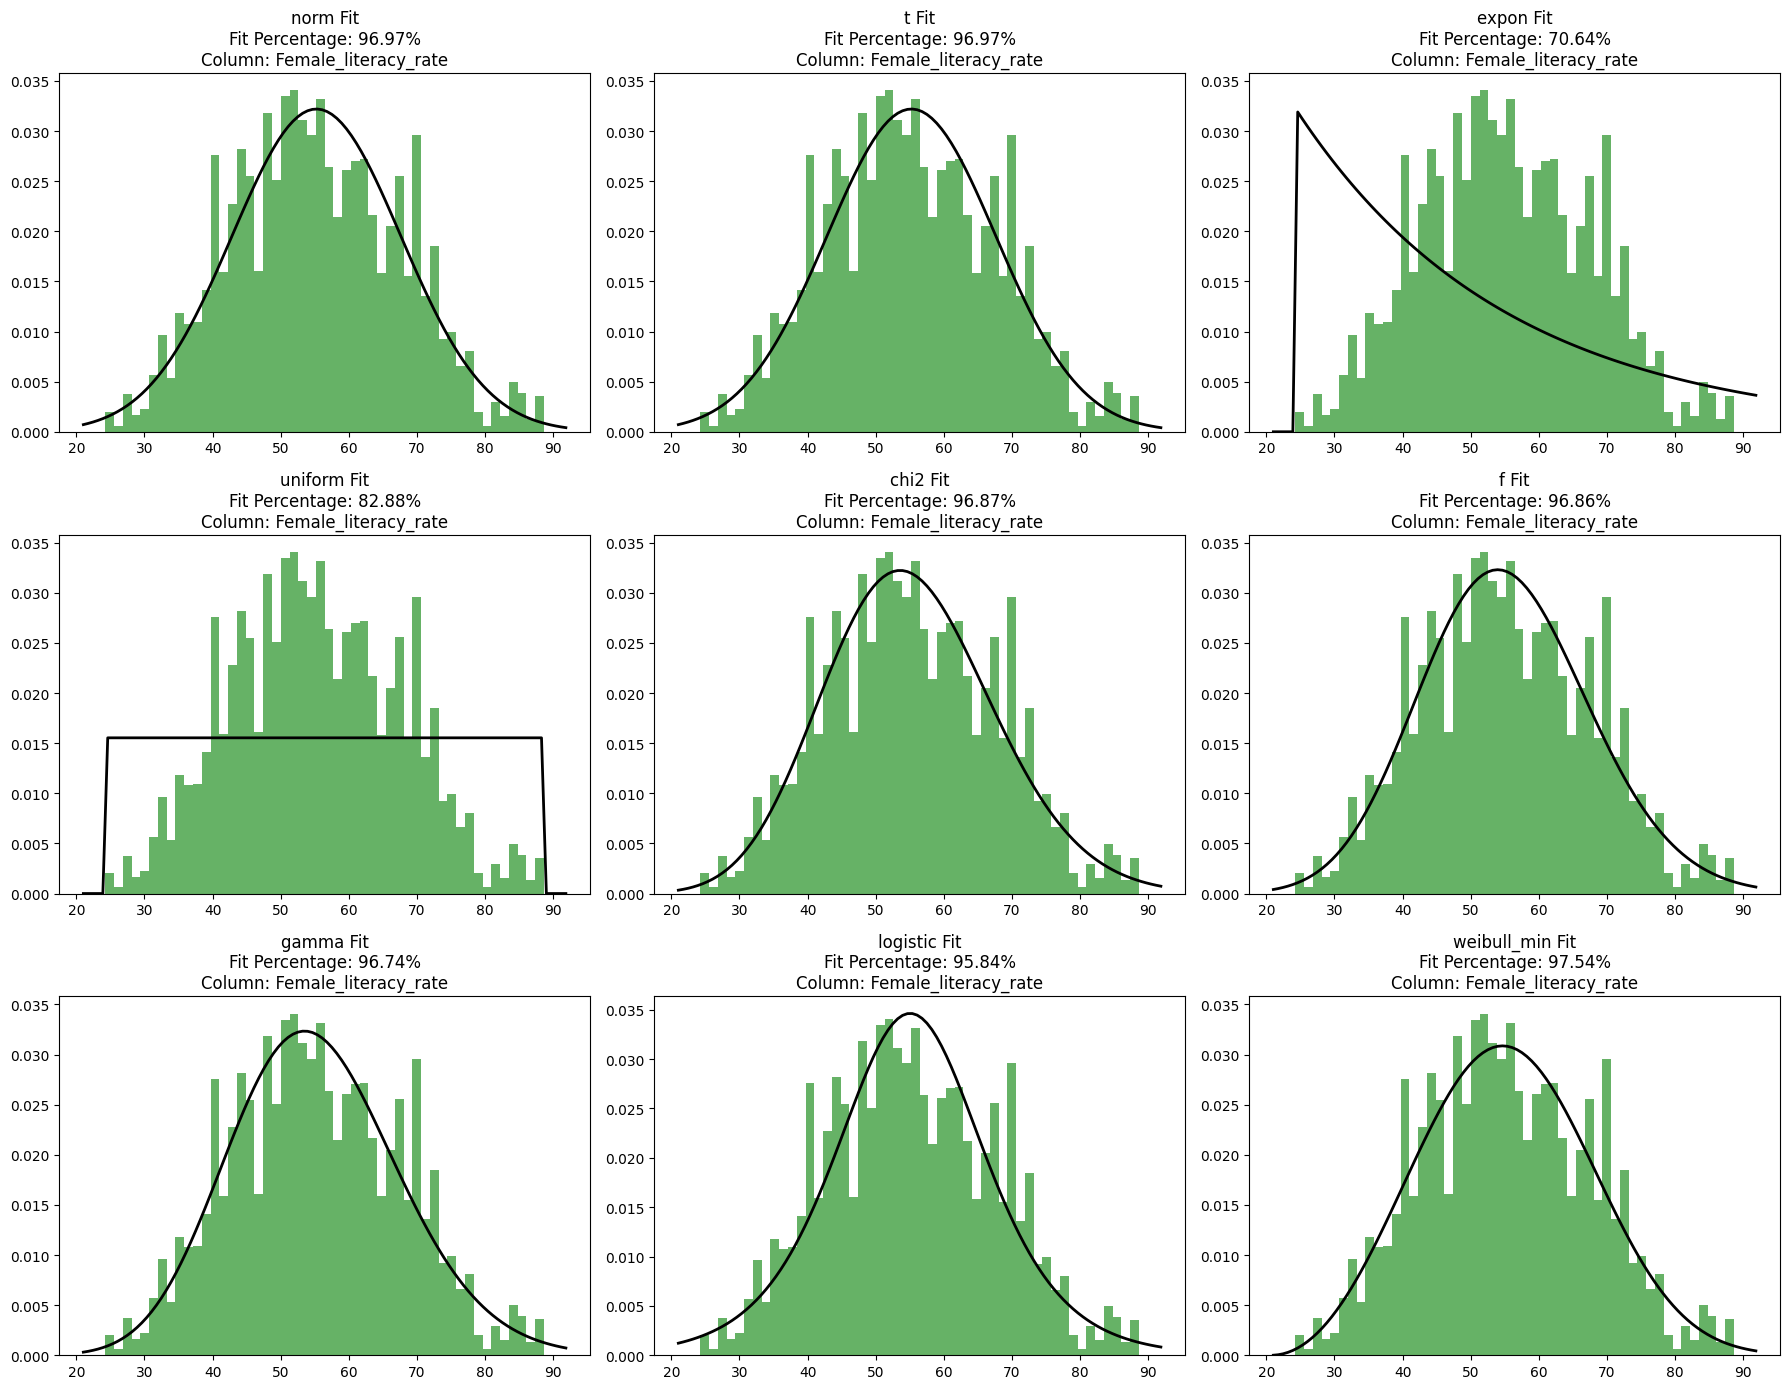

In [30]:
df['Literacy_Rate'] = df['Literate']/df['Population'] * 100 #caluculating literacy rate
df['Graduate_percentage'] = df['Graduate_Education']/df['Population'] * 100 #calculating graduate percentage
df['Female_literacy_rate'] = df['Female_Literate']/df['Female'] * 100 #calculating female literacy rate
df['Urban_percentage'] = df['Urban_Households']/df['Households'] * 100 #calculating urban percentage


columns_of_interest = [
    'Population',
    'Graduate_Education',
    'Urban_percentage',
    'Literacy_Rate',
    'Having_latrine_facility_within_the_premises_Total_Households',
    'Graduate_percentage',
    'Households_with_Internet',
    'Total_Power_Parity',
    'Main_source_of_drinking_water_Spring_Households',
    'Female_literacy_rate'
] # List of columns to fit distributions

for column in columns_of_interest:
    np.random.seed(100)  # Generating random varibale and setting seed for reproducibility
    random_variable = df[column].sample(n=10000, replace=True)  # Sampling 10000 random values 

    distributions = [
        stats.norm,
        stats.t,
        stats.expon,
        stats.uniform,
        stats.chi2,
        stats.f,
        stats.gamma,
        stats.logistic,
        stats.weibull_min
    ] # List of distributions to fit

    # Fit distributions and calculate goodness of fit
    fit_results = []
    for dist in distributions:
        try:
            if dist == stats.gamma:
                params = stats.gamma.fit(random_variable, loc=0, scale=1) # Providing initial guess for the gamma distribution parameters

            else:
                params = dist.fit(random_variable)

            # using the Kolmogorov-Smirnov test to evaluate the fit
            ks_statistic, p_value = stats.kstest(random_variable, dist.cdf, args=params, alternative='two-sided', mode='approx')
            fit_percentage = (1 - ks_statistic) * 100

            fit_results.append((dist, params, fit_percentage))
        except Exception as e:
            print(f"Error fitting distribution {dist.name}: {e}")

    plt.figure(figsize=(18, 14))

    for i, (dist, params, fit_percentage) in enumerate(fit_results):
        plt.subplot(3, 3, i + 1)
        plt.hist(random_variable, bins=50, density=True, alpha=0.6, color='g')

        # Plotting the PDF
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        plt.plot(x, dist.pdf(x, *params), 'k', linewidth=2)

        plt.title(f"{dist.name} Fit\nFit Percentage: {fit_percentage:.2f}%\nColumn: {column}")

    plt.tight_layout()
    plt.show()


Thus we can make the following conclusions:
- <b>Population</b> has a gamma distribution/ exponential distribution/ weibull distribution
- <b>Graduate education</b> has exponential/ gamma/ weibull/ f distribution
- <b>Urban population percentage</b> has chi squared/ gamma/ weibull distribution
- <b>literacy rate</b> has normal/ t/ chi squared/ f/ gamma/ logistic/ weibull distribution
- <b>washroom facilities in home premises</b> has exponential/ gamma/ chi squared/ weibull distribution
- <b>graduate percentage</b> has chi squared/ f/ gamma distribution
- <b>households with internet</b> has f distribution
- <b>total power parity</b> has f/ gamma distribution
- <b>drinking water from spring and other natural sources</b> has weibull/ gamma distribution
- <b>female literacy rate</b> has normal/ t/ chi squared/ logistic/ f/ gamma distribution

multiple fits are due to the sample size being very large (much much greater than 30)

# Correlation analysis of random variables

## Analysis of Literacy and Percentage of Graduates in India

### Introduction
In this analysis, we examine the relationship between literacy rates, the presence of washrooms, and the percentage of graduates in different districts of India. We also explore how internet connectivity in households correlates with the percentage of graduates.

### Data Preparation
We begin by loading the dataset containing census information for India's districts. We extract relevant columns such as population, households, literacy rate, presence of washrooms, number of graduates, and households with internet connectivity.

### Correlation Analysis
We calculate the correlation coefficients between literacy and washrooms, between the percentage of graduates and internet connectivity, and also between percentage of urban households vs percentage of households having computers, scooters, television,etc

### Regression Analysis
We perform three regression analyses:
1. Regression of literacy on washrooms.
2. Regression of the percentage of graduates on internet connectivity.
3.  Regression of the percentage of urban households on households having computers, scooters, television,etc.

We also plot the regression lines to visualize the relationships.

### Results
The regression analyses provide us with coefficients,linear regression curve, point estimator, confidence interval for regression curve and p-values. We also obtain confidence intervals for the regression coefficients.


Correlation coefficient between Literacy and washrooms: 0.5449711989019939
Correlation coefficient between Percentage of grads and Internet connectivity: 0.8093965006411489


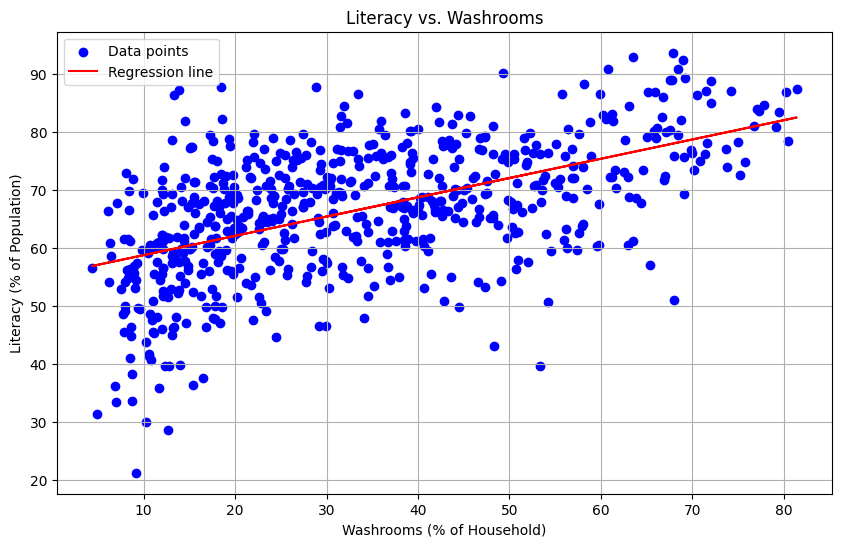

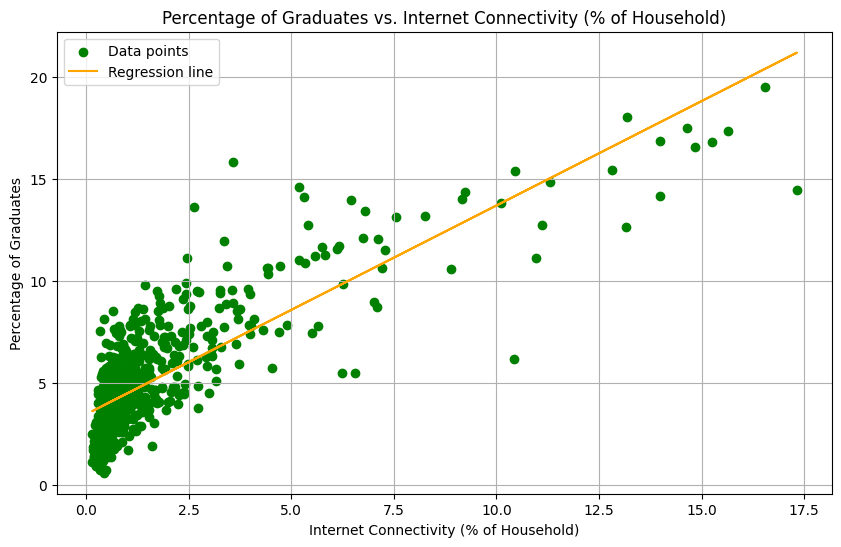

In [31]:
from scipy.stats import pearsonr
import statsmodels.api as sm


data = df

total_population = data['Population']
total_household = data['Households']

literacy = data['Literate_Education']
washroom = data['Having_latrine_facility_within_the_premises_Total_Households'] 
washrooms = (washroom/total_household) * 100
number_of_grads = data['Graduate_Education']
literacy = (literacy/total_population) * 100
percentage_of_grads = (number_of_grads/total_population) * 100
household_with_internet = data['Households_with_Internet']
internet_connectivity = (household_with_internet/total_household) * 100

corr_literacy_washrooms, _ = pearsonr(literacy, washrooms)
print("Correlation coefficient between Literacy and washrooms:", corr_literacy_washrooms)

corr_percentage_grads_internet, _ = pearsonr(percentage_of_grads, internet_connectivity)
print("Correlation coefficient between Percentage of grads and Internet connectivity:", corr_percentage_grads_internet)

X_literacy = sm.add_constant(washrooms)  
model_literacy = sm.OLS(literacy, X_literacy)
result_literacy = model_literacy.fit()

# Regression I: Literacy on washrooms
plt.figure(figsize=(10, 6))
plt.scatter(washrooms, literacy, color='blue', label='Data points')
plt.plot(washrooms, result_literacy.predict(), color='red', label='Regression line')
plt.title('Literacy vs. Washrooms')
plt.xlabel('Washrooms (% of Household)')
plt.ylabel('Literacy (% of Population)')
plt.legend()
plt.grid(True)
plt.show()
X_percentage_grads = sm.add_constant(internet_connectivity)  
model_percentage_grads = sm.OLS(percentage_of_grads, X_percentage_grads)
result_percentage_grads = model_percentage_grads.fit()
# Regression II: Percentage of grads on internet connectivity
plt.figure(figsize=(10, 6))
plt.scatter(internet_connectivity, percentage_of_grads, color='green', label='Data points')
plt.plot(internet_connectivity, result_percentage_grads.predict(), color='orange', label='Regression line')
plt.title('Percentage of Graduates vs. Internet Connectivity (% of Household)')
plt.xlabel('Internet Connectivity (% of Household)')
plt.ylabel('Percentage of Graduates')
plt.legend()
plt.grid(True)
plt.show()

### Point and Interval Estimates for Regression Curves:

In [32]:
confidence_intervals_literacy = result_literacy.conf_int()
confidence_intervals_percentage_grads = result_percentage_grads.conf_int()
point_estimates_literacy = result_literacy.params
point_estimates_percentage_grads = result_percentage_grads.params

print("Confidence Intervals for Literacy vs. Washrooms:")
print(confidence_intervals_literacy)
print("\nConfidence Intervals for Percentage of Graduates vs. Internet Connectivity:")
print(confidence_intervals_percentage_grads)

print("\nPoint Estimates for Literacy vs. Washrooms:")
print(point_estimates_literacy)
print("\nPoint Estimates for Percentage of Graduates vs. Internet Connectivity:")
print(point_estimates_percentage_grads)

Confidence Intervals for Literacy vs. Washrooms:
               0          1
const  53.923999  56.948031
0       0.292045   0.371400

Confidence Intervals for Percentage of Graduates vs. Internet Connectivity:
              0         1
const  3.271348  3.611908
0      0.966248  1.081771

Point Estimates for Literacy vs. Washrooms:
const    55.436015
0         0.331723
dtype: float64

Point Estimates for Percentage of Graduates vs. Internet Connectivity:
const    3.441628
0        1.024009
dtype: float64


### Confidence Intervals:

**Literacy vs. Washrooms:**
- The constant term (intercept) has a 95% confidence interval of [53.924, 56.948], indicating that we are 95% confident that the true mean literacy percentage lies within this range when the percentage of washrooms increases by one unit.
- The coefficient for washrooms has a confidence interval of [0.292, 0.371], meaning that we are 95% confident that the true effect of washrooms on literacy lies within this range.

**Percentage of Graduates vs. Internet Connectivity:**
- Similar to the above, the constant term (intercept) has a confidence interval of [3.271, 3.612], and the coefficient for internet connectivity has a confidence interval of [0.966, 1.082].

### Point Estimates:

**Literacy vs. Washrooms:**
- The point estimate for the constant term is 55.436, and for the washrooms coefficient, it is 0.332. This means that for each additional percentage point increase in washrooms, we expect literacy to increase by approximately 0.332 percentage points, holding other variables constant.

**Percentage of Graduates vs. Internet Connectivity:**
- Similarly, the point estimate for the constant term in this regression is 3.442, and for the internet connectivity coefficient, it is 1.024. This suggests that for each additional percentage point increase in internet connectivity, we expect the percentage of graduates to increase by approximately 1.024 points, holding other variables constant.


## Formulating and Testing Hypothesis
**Hypothesis Testing for Literacy vs. Washrooms:**
- **Null Hypothesis (H0):** There is no significant relationship between literacy rates and the availability of washrooms in a given area.
- **Alternative Hypothesis (H1):** There is a significant relationship between literacy rates and the availability of washrooms in a given area.

**Hypothesis Testing for Number of Graduates vs. Internet Connectivity:**
- **Null Hypothesis (H0):** There is no significant relationship between the number of graduates and internet connectivity in a given area.
- **Alternative Hypothesis (H1):** There is a significant relationship between the number of graduates and internet connectivity in a given area.

**Hypothesis Testing for number of urban households vs. households having computers, scooters, TV, etc:**
- **Null Hypothesis (H0):** There is no significant relationship between urban households and the households having computers, scooters, TV, etc.
- **Alternative Hypothesis (H1):** There is a significant relationship between urban households and the households having computers, scooters, TV, etc

We use a significance level (usually α = 0.05) to determine whether to reject the null hypothesis based on the p-value obtained from the hypothesis test. If the p-value is less than α, we reject the null hypothesis, indicating a significant effect. Otherwise, we fail to reject the null hypothesis.

In [33]:
import scipy.stats as stats

# Hypothesis Testing for Literacy vs. Washrooms
# Perform hypothesis test (Pearson correlation coefficient)
corr, p_value = stats.pearsonr(literacy, washrooms)

print("Correlation coefficient:", corr)
print("p-value:", p_value)

alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between literacy and washrooms.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between literacy and washrooms.")

# Hypothesis Testing for Number of Graduates vs. Internet Connectivity
# Perform hypothesis test (Pearson correlation coefficient)
corr, p_value = stats.pearsonr(percentage_of_grads, internet_connectivity)

print("Correlation coefficient:", corr)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between graduates and internet connectivity.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between graduates and internet connectivity.")

Correlation coefficient: 0.5449711989019939
p-value: 8.737811731061559e-51
Reject the null hypothesis. There is a significant relationship between literacy and washrooms.
Correlation coefficient: 0.8093965006411489
p-value: 1.276010251967299e-149
Reject the null hypothesis. There is a significant relationship between graduates and internet connectivity.


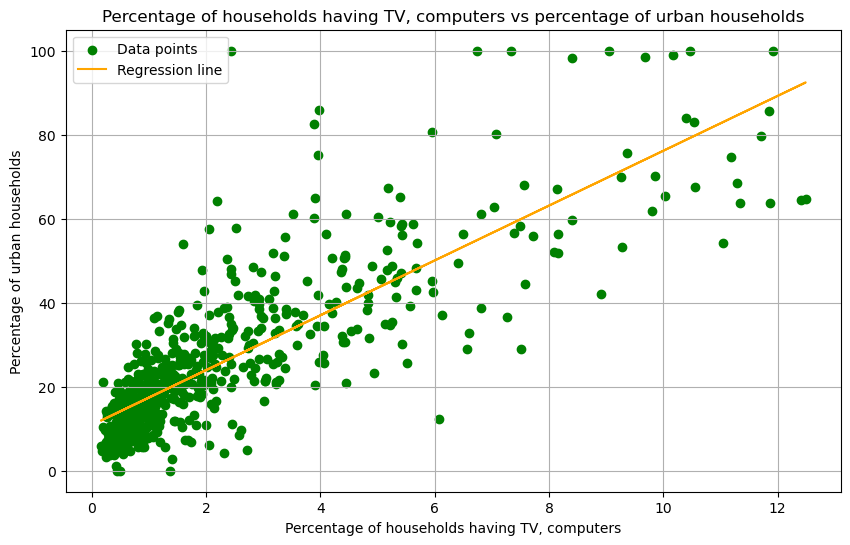

Correlation coefficient: 0.824952226358449


In [13]:
data = df
household_TV = data['Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car']
urban = data['Urban_Households']
total_household = data['Households']    # Data corresponding to the desired columns above
household_TV_percentage = (household_TV/ total_household) * 100 
urban_percentage = (urban/total_household)*100  # Converting above data into as a percentage of total households



z_scores = (household_TV_percentage - household_TV_percentage.mean()) / household_TV_percentage.std()  # Removing outliers
outlier_mask = z_scores.abs() < 3  # Assuming outliers are those with z-score greater than 3
household_TV_percentage = household_TV_percentage[outlier_mask]
urban_percentage = urban_percentage[outlier_mask]


X = sm.add_constant(household_TV_percentage)  # Performing linear regression
model = sm.OLS(urban_percentage, X)
results = model.fit()


plt.figure(figsize=(10, 6))    # Plotting a scatter plot and fitting an appropriate regression line into it
plt.scatter(household_TV_percentage,urban_percentage, color='green', label='Data points')
plt.plot(household_TV_percentage, results.predict(), color='orange', label='Regression line')
plt.title('Percentage of households having TV, computers vs percentage of urban households')
plt.xlabel('Percentage of households having TV, computers')
plt.ylabel('Percentage of urban households')
plt.legend()
plt.grid(True)
plt.show()


# Calculating correlation coefficient
correlation_coefficient, _ = pearsonr(household_TV_percentage,urban_percentage)
print("Correlation coefficient:", correlation_coefficient)

In [14]:
confidence_intervals = results.conf_int()  # Confidence intervals for the regression coefficients

print("Confidence intervals for the regression coefficients:")
print(confidence_intervals)

Confidence intervals for the regression coefficients:
              0          1
const  9.730685  12.069623
0      6.176366   6.880771


In [15]:
correlation_coefficient, p_value = pearsonr(household_TV_percentage, urban_percentage)

print("Correlation coefficient:", correlation_coefficient)  # Printing the correlation coefficient and p-value
print("P-value:", p_value)

alpha = 0.05  #Significance level


if p_value < alpha:  # Checking if the p-value is less than alpha
    print("Null hypothesis is rejected. There is a significant linear correlation between the variables.")
else:
    print("Null hypothesis is not rejected. There is not enough evidence to suggest a linear correlation between the variables.")

Correlation coefficient: 0.824952226358449
P-value: 2.877609640723093e-156
Null hypothesis is rejected. There is a significant linear correlation between the variables.


# Hypothesis testing 

We want to know whether there is a correlation between having higher graduates and more urban population.

To achieve this, first we must modify our data in order to make our analysis easier.
The raw data obtained by us had columns for districtwise population, number of graduates, number of households and number fo urban households. 

Hence, we found the districtwise percentage of graduates and the districtwise percetage of urban households

In [34]:
df['Graduate%'] = df['Graduate_Education'] / df['Population'] * 100  #finding districtwise percentage of graduates
df['Urban%'] = df['Urban_Households']/df['Households'] * 100  #finding districtwise percentage of urban households
hypo_df= df[['Graduate%', 'Urban%']]

We will take our null hypothesis to be that there is no correlation between graduate population and urban population, ie, beta = 0.
Hence, alternate hypothesis would be that there is a correlation between graduate population and urban population, ie, beta != 0.

Null hypothesis, H0: Beta = 0
Alternate hypothesis, H1: Beta != 0

In [35]:
#Note that we have not taken a smaller sample here since sample size is 640, being ideal for calculation
sample_size = len(hypo_df) # sample size for hypothesis testing

mean_graduate = hypo_df['Graduate%'].sample(n=sample_size).mean() #finding mean of districtwise graduate percentage
mean_urban = hypo_df['Urban%'].sample(n=sample_size).mean() #finding mean of districtwise urban percentage

sxx = sum((x-mean_urban)**2 for x in hypo_df['Urban%']) #finding S_xx 
syy = sum((x-mean_graduate)**2 for x in hypo_df['Graduate%']) #finding S_YY
sxy = sum(((hypo_df['Graduate%'][i] - mean_graduate) * (hypo_df['Urban%'][i] - mean_urban)) for i in range(sample_size)) #S_xY

beta_est = sxy/sxx #finding beta estimate, B = S_xy/S_xx
print(beta_est)
ssr = (sxx*syy - sxy**2)/sxx #finding sum of sqaures of residuals

val = np.sqrt((sample_size-2)*sxx/ssr)*abs(beta_est) #finding t value, t = sqrt((n-2)*S_xx/SSR)*|B|
print(val)
t_value= 1.645 #value corresponsing to n-2 tending to infinity, and alpha = 0.05. By CLT we can treat the t statistic to be the same as the z statistic

if val > t_value:
    print('Reject Null Hypothesis: There is a correlation between Graduate% and Urban%')
else:
    print('Accept Null Hypothesis: There is no correlation between Graduate% and Urban%')

0.11086010103861788
29.76259988431313
Reject Null Hypothesis: There is a correlation between Graduate% and Urban%


We can verify this by actually finding the correlation coefficient for the data 

In [36]:
covariance = hypo_df.cov().iloc[0,1]
variance_graduate = hypo_df['Graduate%'].var()
variance_urban = hypo_df['Urban%'].var()

correlation = covariance / (np.sqrt(variance_graduate) * np.sqrt(variance_urban))
print("correlation coeficcient is ",correlation)

correlation coeficcient is  0.7624390316922784


We can see that the correlation coefficient between both the random variables is 0.76, which shows that there is a high correlation between the 2. 

Let us now also look at the actual data points via a scatter plot and compare it with a line fitted by regression

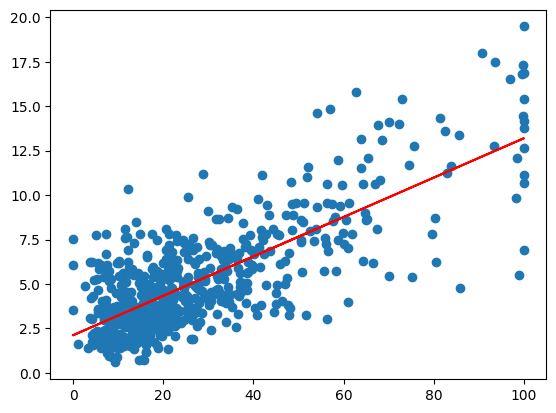

In [37]:
alpha_est = mean_graduate - beta_est*mean_urban #finding alpha estimate, A = mean_graduate - B*mean_urban
reg_line = beta_est*hypo_df['Urban%'] + alpha_est #finding predicted values of Graduate% using Urban%

plt.scatter(hypo_df['Urban%'], hypo_df['Graduate%'])
plt.plot(hypo_df['Urban%'], reg_line, color='red')

plt.show()

Thus we can see that there is a relation between graduate population and urban population. 

So with lower urban population it is safe to say that there will be lower graduate percentage and vice versa

Next let us test the hypothesis that Rajasthan and Haryana have similar female literacy rates

First we find the percentage of female literate population
Then we filter the dataframe so as to only consider the data concerning Rajasthan and Haryana

In [38]:
filtered_df = df[df['State name'].isin(['RAJASTHAN', 'HARYANA'])] # Filter the dataframe for the states Kerala and Haryana

filtered_df['Female_Literate_Percentage'] = (filtered_df['Female_Literate'] / filtered_df['Female']) * 100 # Calculate the female literate population percentage

C:\Users\anany\AppData\Local\Temp\ipykernel_10208\434917588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Female_Literate_Percentage'] = (filtered_df['Female_Literate'] / filtered_df['Female']) * 100 # Calculate the female literate population percentage


In [39]:
rajasthan_sample = filtered_df[filtered_df['State name'] == 'RAJASTHAN'] # Filter the dataframe for rajasthan
haryana_sample = filtered_df[filtered_df['State name'] == 'HARYANA'] # Filter the dataframe for haryana

rajasthan_female_literate_percentage = rajasthan_sample['Female_Literate_Percentage'] # female literate percentage for rajasthan
haryana_female_literate_percentage = haryana_sample['Female_Literate_Percentage'] # female literate percentage for haryana

len1 = len(rajasthan_female_literate_percentage) # sample size for rajasthan
len2 = len(haryana_female_literate_percentage) # sample size for haryana

mean_rajasthan = np.mean(rajasthan_female_literate_percentage) # mean of female literacy rate for rajasthan
std_rajasthan = np.std(rajasthan_female_literate_percentage) # standard deviation of female literacy rate for rajasthan

mean_haryana = np.mean(haryana_female_literate_percentage) # mean of female literacy rate for haryana
std_haryana = np.std(haryana_female_literate_percentage) # standard deviation of female literacy rate for haryana

z_val = (mean_rajasthan - mean_haryana) / np.sqrt((std_rajasthan**2 / len1) + (std_haryana**2 / len2)) #calculating z-value

alpha = 0.05 # significance level

if abs(z_val) < 1.96:
    print('Accept Null Hypothesis: Haryana and rajasthan have similar female literacy rates')
else:
    print('Reject Null Hypthesis: Haryana and rajasthan do not have similar female literacy rates')

Reject Null Hypthesis: Haryana and rajasthan do not have similar female literacy rates


We can verify this by plotting bargraphs and comparing them

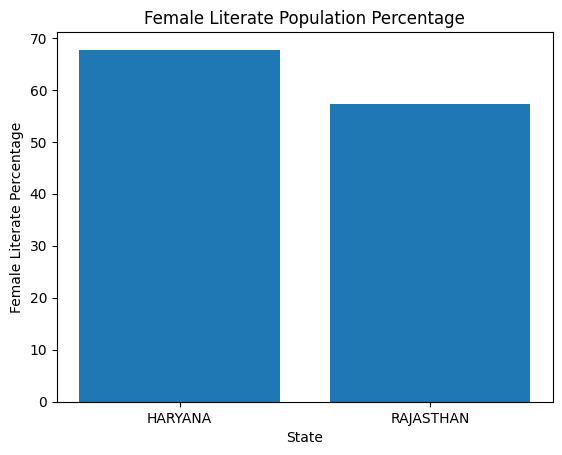

In [40]:
plt.bar(filtered_df['State name'], filtered_df['Female_Literate_Percentage'])
plt.title('Female Literate Population Percentage')
plt.xlabel('State')
plt.ylabel('Female Literate Percentage')
plt.show()

Thus we have concluded from hypothesis testing that haryana and rajasthan do not have similar literacy rates

This can also be proven by the bar plot, which clearly shows that there is a difference of 10% in the literacy rates, thus validating our hypothesis. 

# Regression to Predict 2021 population

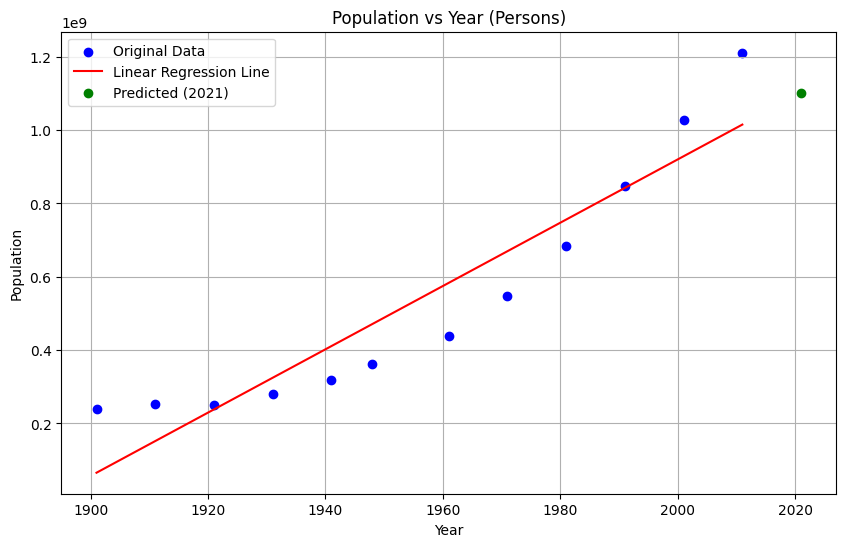

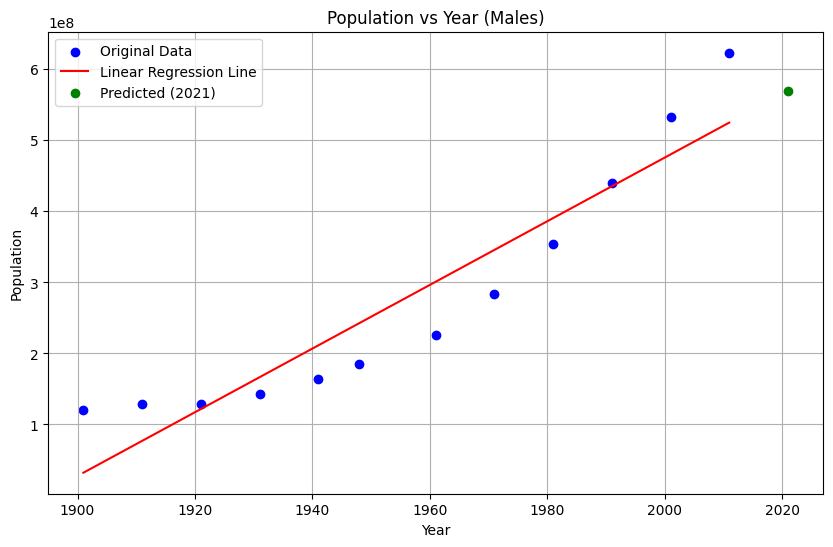

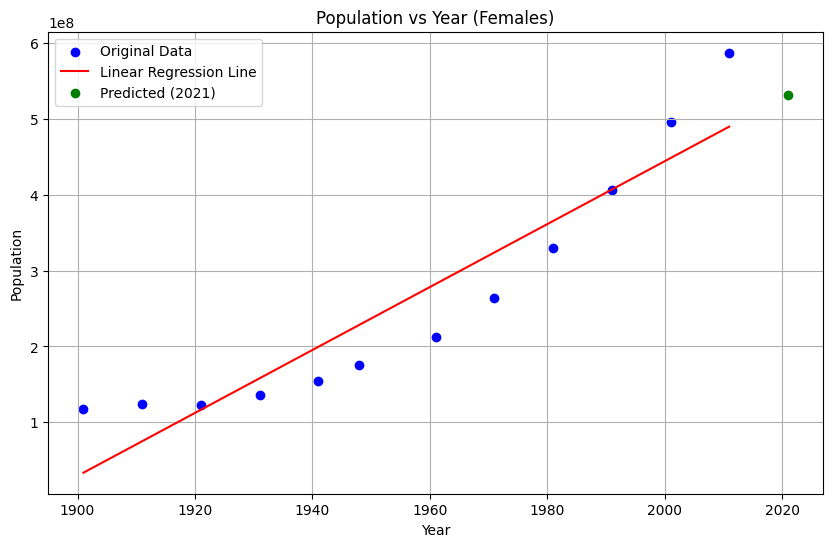

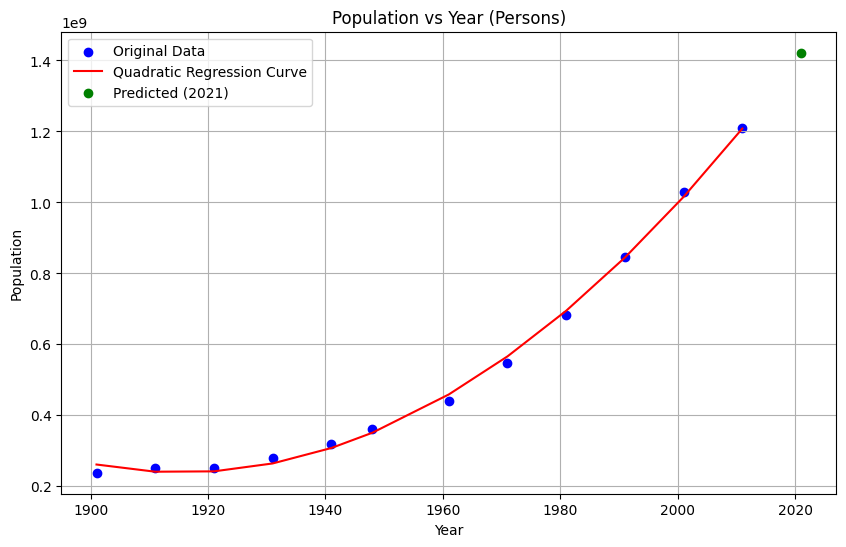

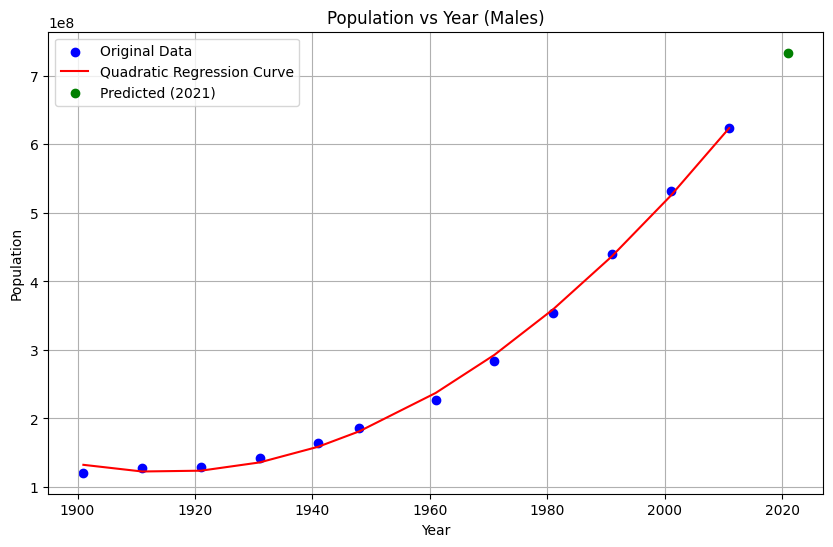

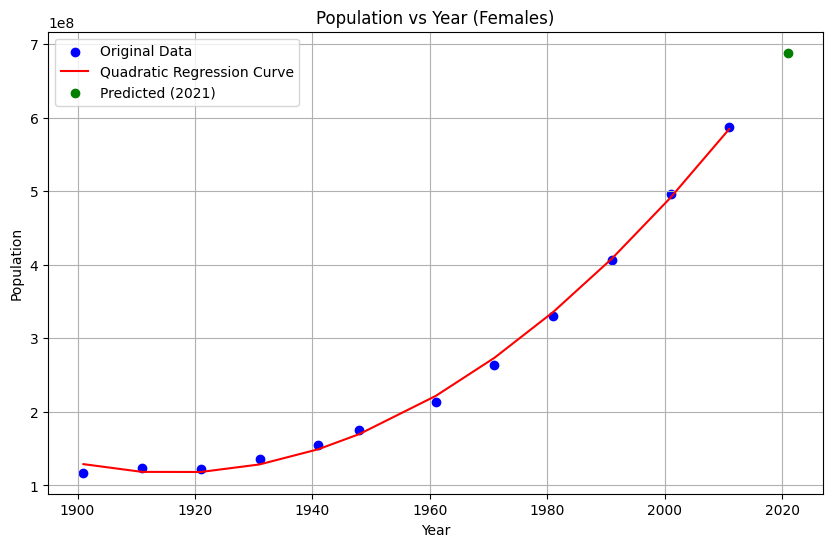

R^2 score for Persons linear model: 0.8753633706411186
R^2 score for Males linear model: 0.8784788577411696
R^2 score for Females linear model: 0.8720178055545572

R^2 score for Persons quadratic model: 0.9982149682076517
R^2 score for Males quadratic model: 0.9982397602127043
R^2 score for Females quadratic model: 0.9981233411450081

Predicted population for 2021 census (Persons) using linear regression: 1101198516
Predicted population for 2021 census (Males) using linear regression: 569680640
Predicted population for 2021 census (Females) using linear regression: 531561683

Predicted population for 2021 census (Persons) using quadratic regression: 1421821970
Predicted population for 2021 census (Males) using quadratic regression: 733723200
Predicted population for 2021 census (Females) using quadratic regression: 688135210

Linear Regression Coefficients (Persons):
Intercept (beta0): -16339562730.63002
Slope (beta1): 8629768.05903789

Quadratic Regression Coefficients (Persons):
Inte

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


data = pd.read_csv(r'population.csv') #census data from 1901 to 2011
data[['Persons', 'Males', 'Females']] = data[['Persons', 'Males', 'Females']].apply(lambda x: x.str.replace(',', '').astype(int))

X = data['Census'].values.reshape(-1, 1)
y_persons = data['Persons'].values
y_males = data['Males'].values
y_females = data['Females'].values

model_persons_linear = LinearRegression()
model_males_linear = LinearRegression()
model_females_linear = LinearRegression()
model_persons_linear.fit(X, y_persons)
model_males_linear.fit(X, y_males)
model_females_linear.fit(X, y_females)

predicted_persons_2021_linear = model_persons_linear.predict([[2021]])
predicted_males_2021_linear = model_males_linear.predict([[2021]])
predicted_females_2021_linear = model_females_linear.predict([[2021]])

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model_persons_quadratic = LinearRegression()
model_males_quadratic = LinearRegression()
model_females_quadratic = LinearRegression()
model_persons_quadratic.fit(X_poly, y_persons)
model_males_quadratic.fit(X_poly, y_males)
model_females_quadratic.fit(X_poly, y_females)

X_2021 = np.array([[2021]])
X_2021_poly = poly_features.transform(X_2021)

predicted_persons_2021_quadratic = model_persons_quadratic.predict(X_2021_poly)
predicted_males_2021_quadratic = model_males_quadratic.predict(X_2021_poly)
predicted_females_2021_quadratic = model_females_quadratic.predict(X_2021_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_persons, color='blue', label='Original Data')
plt.plot(X, model_persons_linear.predict(X), color='red', label='Linear Regression Line')
plt.scatter(2021, predicted_persons_2021_linear, color='green', label='Predicted (2021)')
plt.title('Population vs Year (Persons)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y_males, color='blue', label='Original Data')
plt.plot(X, model_males_linear.predict(X), color='red', label='Linear Regression Line')
plt.scatter(2021, predicted_males_2021_linear, color='green', label='Predicted (2021)')
plt.title('Population vs Year (Males)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y_females, color='blue', label='Original Data')
plt.plot(X, model_females_linear.predict(X), color='red', label='Linear Regression Line')
plt.scatter(2021, predicted_females_2021_linear, color='green', label='Predicted (2021)')
plt.title('Population vs Year (Females)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y_persons, color='blue', label='Original Data')
plt.plot(X, model_persons_quadratic.predict(X_poly), color='red', label='Quadratic Regression Curve')
plt.scatter(2021, predicted_persons_2021_quadratic, color='green', label='Predicted (2021)')
plt.title('Population vs Year (Persons)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y_males, color='blue', label='Original Data')
plt.plot(X, model_males_quadratic.predict(X_poly), color='red', label='Quadratic Regression Curve')
plt.scatter(2021, predicted_males_2021_quadratic, color='green', label='Predicted (2021)')
plt.title('Population vs Year (Males)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y_females, color='blue', label='Original Data')
plt.plot(X, model_females_quadratic.predict(X_poly), color='red', label='Quadratic Regression Curve')
plt.scatter(2021, predicted_females_2021_quadratic, color='green', label='Predicted (2021)')
plt.title('Population vs Year (Females)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

r2_persons_linear = r2_score(y_persons, model_persons_linear.predict(X))
r2_males_linear = r2_score(y_males, model_males_linear.predict(X))
r2_females_linear = r2_score(y_females, model_females_linear.predict(X))

print("R^2 score for Persons linear model:", r2_persons_linear)
print("R^2 score for Males linear model:", r2_males_linear)
print("R^2 score for Females linear model:", r2_females_linear)

r2_persons_quadratic = r2_score(y_persons, model_persons_quadratic.predict(X_poly))
r2_males_quadratic = r2_score(y_males, model_males_quadratic.predict(X_poly))
r2_females_quadratic = r2_score(y_females, model_females_quadratic.predict(X_poly))

print("\nR^2 score for Persons quadratic model:", r2_persons_quadratic)
print("R^2 score for Males quadratic model:", r2_males_quadratic)
print("R^2 score for Females quadratic model:", r2_females_quadratic)

print("\nPredicted population for 2021 census (Persons) using linear regression:", int(predicted_persons_2021_linear[0]))
print("Predicted population for 2021 census (Males) using linear regression:", int(predicted_males_2021_linear[0]))
print("Predicted population for 2021 census (Females) using linear regression:", int(predicted_females_2021_linear[0]))

print("\nPredicted population for 2021 census (Persons) using quadratic regression:", int(predicted_persons_2021_quadratic[0]))
print("Predicted population for 2021 census (Males) using quadratic regression:", int(predicted_males_2021_quadratic[0]))
print("Predicted population for 2021 census (Females) using quadratic regression:", int(predicted_females_2021_quadratic[0]))

print("\nLinear Regression Coefficients (Persons):")
print("Intercept (beta0):", model_persons_linear.intercept_)
print("Slope (beta1):", model_persons_linear.coef_[0])

print("\nQuadratic Regression Coefficients (Persons):")
print("Intercept (beta0):", model_persons_quadratic.intercept_)
print("Coefficient of linear term (beta1):", model_persons_quadratic.coef_[0])
print("Coefficient of quadratic term (beta2):", model_persons_quadratic.coef_[1])


## Analysis Summary

### Linear Regression
1. **Modeling:** Linear regression models were fitted to the data for predicting population trends over the years for both overall population, males, and females separately.
2. **Prediction:** Predictions were made for the year 2021 using the linear regression models.
3. **Evaluation:** The coefficient of determination (R^2 score) was calculated to evaluate the goodness of fit of the linear regression models.

### Quadratic Regression
1. **Modeling:** Quadratic regression models were fitted to the data to capture potential non-linear relationships between year and population.
2. **Prediction:** Predictions for 2021 were made using the quadratic regression models.
3. **Evaluation:** R^2 scores were calculated to assess the accuracy of the quadratic regression models.

### Results Summary
- **Linear Regression:** R^2 scores indicate a good fit for linear regression models, with scores around 0.87 for all populations (overall, males, females).
- **Quadratic Regression:** Quadratic regression models achieve remarkably high R^2 scores close to 1, suggesting an excellent fit to the data.
- **Predictions for 2021:** Both linear and quadratic regression models predict population figures for 2021, with quadratic models yielding substantially higher values.
- **Coefficients:** Coefficients of the regression models were also provided, showcasing the intercepts and slopes for linear models and additional quadratic term coefficients for quadratic models.

## Formulas

### Linear Regression
The linear regression model can be represented by the equation:
Y = β_0 + β_1 X + ε 
- Y is the predicted population.
- X is the year.
- β_0 is the intercept.
- β_1 is the slope.
- ε is the error term.

### Quadratic Regression
The quadratic regression model extends the linear model by including a quadratic term:
Y = β_0 + β_1 X + β_2 X^2 + ε 
-  β_2 is the coefficient of the quadratic term.


## Results

- **R^2 score for Linear Regression:**
  - Persons: 0.875
  - Males: 0.878
  - Females: 0.872

- **R^2 score for Quadratic Regression:**
  - Persons: 0.998
  - Males: 0.998
  - Females: 0.998

#####################################
- **Predicted Population for 2021:**
  - Linear Regression:
    - Persons: 1,101,198,516
    - Males: 569,680,640
    - Females: 531,561,683
  - Quadratic Regression:
    - Persons: 1,421,821,970
    - Males: 733,723,200
    - Females: 688,135,210

- **Actual Population for 2021:**
    - Persons: 1,407,563,842
    - Males: 743,392,561
    - Females: 698,327,291
    
####################################

### Linear Regression (Persons)
- **Coefficients:**
    - Intercept: -16,339,562,730.63
    - Slope: 8,629,768.06

    - Y = β_0 + β_1 X + ε 
    - Y = -16,339,562,730.63 + 8,629,768.06 X + ε 

### Quadratic Regression (Persons)
- **Coefficients:**
    - Intercept: 390,368,739,732.02
    - Linear Term Coefficient: 0.0
    - Quadratic Term Coefficient: -407,333,591.66

    - Y = β_0 + β_1 X + β_2 X^2 + ε 
    - Y = 390,368,739,732.02 + -407,333,591.66 X^2 + ε

These results suggest that while linear regression provides reasonably good fits, quadratic regression captures the data's nuances more accurately, resulting in higher R^2 scores and more accurate predictions for the year 2021.